# Part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import re
import opendatasets as od
import missingno as msno
import scikitplot as skplt
import sklearn

from scipy.stats import randint

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

warnings.filterwarnings('ignore')

## Data Acquisiton and Preprocessing

PCOS dataset is available in kaggle. The dataset consists of 541 rows and 45 columns. The data is collected from 10 different hospitals across Kerala, India. There are a total of 44 parameters to determine PCOS and related issues. Data has categorical and numerical variables. Data is in Excel format.

In [2]:
od.download('https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos?resource=download')

Skipping, found downloaded files in ".\polycystic-ovary-syndrome-pcos" (use force=True to force download)


In [3]:
PCOS_woinf =pd.read_excel('polycystic-ovary-syndrome-pcos/\PCOS_data_without_infertility.xlsx', sheet_name="Full_new")
PCOS_inf =pd.read_csv('polycystic-ovary-syndrome-pcos/\PCOS_infertility.csv')

PCOS_woinf.head()

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.300000           15                78                22  ...   
1  24.921163           15                74                20  ...   
2  25.270891           11                72                18  ...   
3  29.674945           13                72                20  ...   
4  20.060954           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110   
1              0.0                  0                  120   
2              1.0                  0                  120   
3              0.0                  0                  120   
4              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

   Avg. F size (L) (mm) Avg. F size (R) (mm)  Endometrium (mm)  Unnamed: 44  
0                  18.0                 18.0               8.5          NaN  
1                  15.0                 14.0               3.7          NaN  
2                  18.0                 20.0              10.0          NaN  
3                  15.0                 14.0               7.5          NaN  
4                  16.0                 14.0               7.0          NaN  

[5 rows x 45 columns]

In [4]:
PCOS_inf.head()

Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
0       1             10001           0                    1.99   
1       2             10002           0                   60.80   
2       3             10003           1                  494.08   
3       4             10004           0                    1.99   
4       5             10005           0                  801.45   

   II    beta-HCG(mIU/mL) AMH(ng/mL)  
0                    1.99       2.07  
1                    1.99       1.53  
2                  494.08       6.63  
3                    1.99       1.22  
4                  801.45       2.26

In [5]:
#There are two files in the file. However I did not use the second one as the first file has all the features I needed.
data = PCOS_woinf

In [6]:
data.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

There are unnecessary spaces in column names:

In [7]:
data.columns = [col.strip() for col in data.columns]
data.columns = [re.sub(' +', ' ', col) for col in data.columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sl. No                 541 non-null    int64  
 1   Patient File No.       541 non-null    int64  
 2   PCOS (Y/N)             541 non-null    int64  
 3   Age (yrs)              541 non-null    int64  
 4   Weight (Kg)            541 non-null    float64
 5   Height(Cm)             541 non-null    float64
 6   BMI                    541 non-null    float64
 7   Blood Group            541 non-null    int64  
 8   Pulse rate(bpm)        541 non-null    int64  
 9   RR (breaths/min)       541 non-null    int64  
 10  Hb(g/dl)               541 non-null    float64
 11  Cycle(R/I)             541 non-null    int64  
 12  Cycle length(days)     541 non-null    int64  
 13  Marraige Status (Yrs)  540 non-null    float64
 14  Pregnant(Y/N)          541 non-null    int64  
 15  No. of

Two columns in object type, although they actually contains numerical features:

In [9]:
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')

In [10]:
data['AMH(ng/mL)'].head()

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: float64

In [11]:
data["II beta-HCG(mIU/mL)"] = pd.to_numeric(data["II beta-HCG(mIU/mL)"], errors='coerce')

In [12]:
data['II beta-HCG(mIU/mL)'].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II beta-HCG(mIU/mL), dtype: float64

Checking if there are missing values:

In [13]:
data.isna().sum()

Sl. No                     0
Patient File No.           0
PCOS (Y/N)                 0
Age (yrs)                  0
Weight (Kg)                0
Height(Cm)                 0
BMI                        0
Blood Group                0
Pulse rate(bpm)            0
RR (breaths/min)           0
Hb(g/dl)                   0
Cycle(R/I)                 0
Cycle length(days)         0
Marraige Status (Yrs)      1
Pregnant(Y/N)              0
No. of aborptions          0
I beta-HCG(mIU/mL)         0
II beta-HCG(mIU/mL)        1
FSH(mIU/mL)                0
LH(mIU/mL)                 0
FSH/LH                     0
Hip(inch)                  0
Waist(inch)                0
Waist:Hip Ratio            0
TSH (mIU/L)                0
AMH(ng/mL)                 1
PRL(ng/mL)                 0
Vit D3 (ng/mL)             0
PRG(ng/mL)                 0
RBS(mg/dl)                 0
Weight gain(Y/N)           0
hair growth(Y/N)           0
Skin darkening (Y/N)       0
Hair loss(Y/N)             0
Pimples(Y/N)  

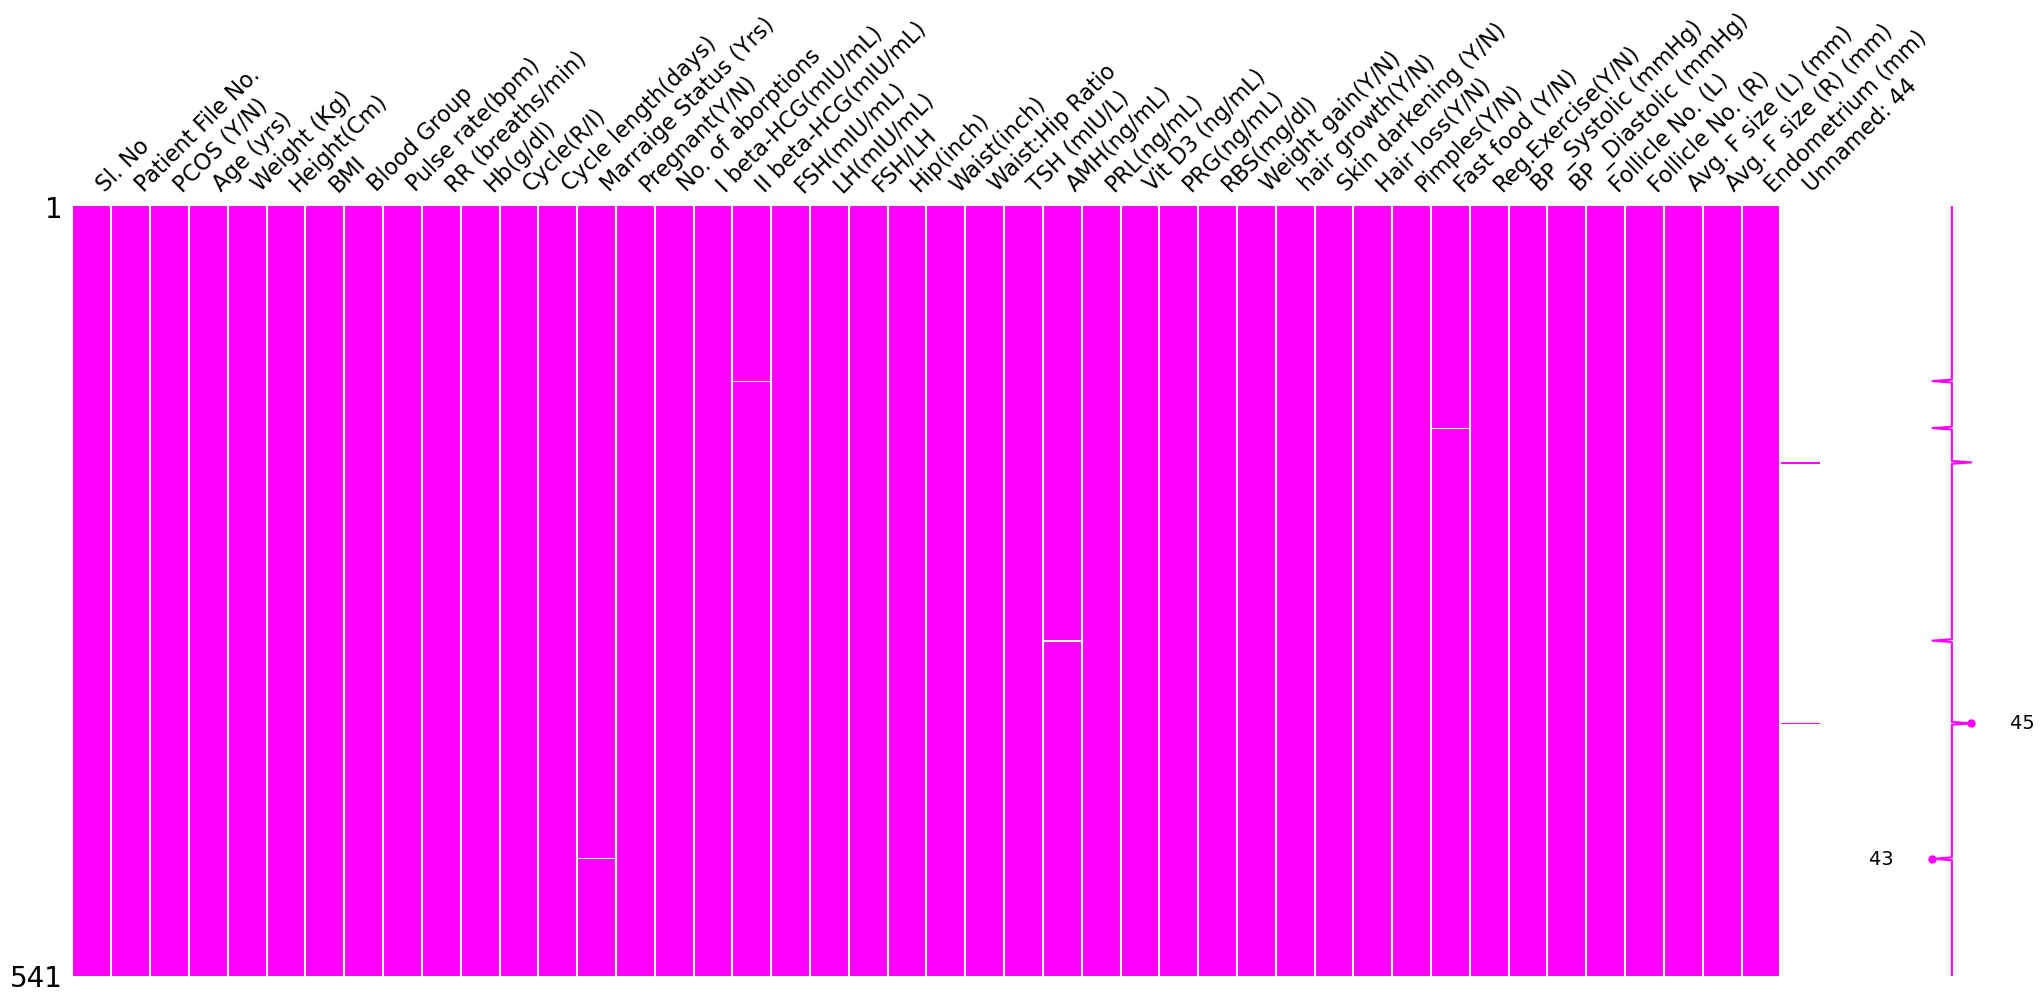

In [14]:
msno.matrix(data, color=(1, 0, 1))
plt.show()

One column is empty

In [15]:
data = data.drop(['Unnamed: 44'], axis = 1) 
print(data.shape)

(541, 44)


Some columns have empty rows

In [16]:
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].mean(),inplace=True)
data['II beta-HCG(mIU/mL)'].fillna(data['II beta-HCG(mIU/mL)'].mean(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].mean(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

In [17]:
data.head()

Sl. No  Patient File No.  PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)  \
0       1                 1           0         28         44.6       152.0   
1       2                 2           0         36         65.0       161.5   
2       3                 3           1         33         68.8       165.0   
3       4                 4           0         37         65.0       148.0   
4       5                 5           0         25         52.0       161.0   

         BMI  Blood Group  Pulse rate(bpm)  RR (breaths/min)  ...  \
0  19.300000           15               78                22  ...   
1  24.921163           15               74                20  ...   
2  25.270891           11               72                18  ...   
3  29.674945           13               72                20  ...   
4  20.060954           11               72                18  ...   

   Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0             0              1.0                  0                  110   
1             0              0.0                  0                  120   
2             1              1.0                  0                  120   
3             0              0.0                  0                  120   
4             0              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

   Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                  18.0                  18.0               8.5  
1                  15.0                  14.0               3.7  
2                  18.0                  20.0              10.0  
3                  15.0                  14.0               7.5  
4                  16.0                  14.0               7.0  

[5 rows x 44 columns]

Some columns have categorical data but their type is not categorical. It causes statistics to be misleading

In [18]:
data['Pregnant(Y/N)'].describe()
print(data['PCOS (Y/N)'].describe())
data['PCOS (Y/N)_cat'] = data['PCOS (Y/N)'].astype('category')
assert data['PCOS (Y/N)_cat'].dtype  == 'category'
print('\n')
print(data['PCOS (Y/N)_cat'].describe())

count    541.000000
mean       0.327172
std        0.469615
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: PCOS (Y/N), dtype: float64


count     541
unique      2
top         0
freq      364
Name: PCOS (Y/N)_cat, dtype: int64


In [19]:
def to_category(col_nm):
    data[col_nm] = data[col_nm].astype('category')

to_category('Pregnant(Y/N)')
to_category('Skin darkening (Y/N)')
to_category('Hair loss(Y/N)')
to_category('Pimples(Y/N)')
to_category('Fast food (Y/N)')
to_category('Reg.Exercise(Y/N)')

In [20]:
data.describe()

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
count  541.000000        541.000000  541.000000  541.000000   541.000000   
mean   271.000000        271.000000    0.327172   31.430684    59.637153   
std    156.317519        156.317519    0.469615    5.411006    11.028287   
min      1.000000          1.000000    0.000000   20.000000    31.000000   
25%    136.000000        136.000000    0.000000   28.000000    52.000000   
50%    271.000000        271.000000    0.000000   31.000000    59.000000   
75%    406.000000        406.000000    1.000000   35.000000    65.000000   
max    541.000000        541.000000    1.000000   48.000000   108.000000   

       Height(Cm)         BMI  Blood Group  Pulse rate(bpm)  RR (breaths/min)  \
count  541.000000  541.000000   541.000000       541.000000        541.000000   
mean   156.484835   24.311285    13.802218        73.247689         19.243993   
std      6.033545    4.056399     1.840812         4.430285          1.688629   
min    137.000000   12.417882    11.000000        13.000000         16.000000   
25%    152.000000   21.641274    13.000000        72.000000         18.000000   
50%    156.000000   24.238227    14.000000        72.000000         18.000000   
75%    160.000000   26.634958    15.000000        74.000000         20.000000   
max    180.000000   38.900000    18.000000        82.000000         28.000000   

       ...  RBS(mg/dl)  Weight gain(Y/N)  hair growth(Y/N)  \
count  ...  541.000000        541.000000        541.000000   
mean   ...   99.835860          0.377079          0.273567   
std    ...   18.559298          0.485104          0.446202   
min    ...   60.000000          0.000000          0.000000   
25%    ...   92.000000          0.000000          0.000000   
50%    ...  100.000000          0.000000          0.000000   
75%    ...  107.000000          1.000000          1.000000   
max    ...  350.000000          1.000000          1.000000   

       BP _Systolic (mmHg)  BP _Diastolic (mmHg)  Follicle No. (L)  \
count           541.000000            541.000000        541.000000   
mean            114.661738             76.927911          6.129390   
std               7.384556              5.574112          4.229294   
min              12.000000              8.000000          0.000000   
25%             110.000000             70.000000          3.000000   
50%             110.000000             80.000000          5.000000   
75%             120.000000             80.000000          9.000000   
max             140.000000            100.000000         22.000000   

       Follicle No. (R)  Avg. F size (L) (mm)  Avg. F size (R) (mm)  \
count        541.000000            541.000000            541.000000   
mean           6.641405             15.018115             15.451701   
std            4.436889              3.566839              3.318848   
min            0.000000              0.000000              0.000000   
25%            3.000000             13.000000             13.000000   
50%            6.000000             15.000000             16.000000   
75%           10.000000             18.000000             18.000000   
max           20.000000             24.000000             24.000000   

       Endometrium (mm)  
count        541.000000  
mean           8.475915  
std            2.165381  
min            0.000000  
25%            7.000000  
50%            8.500000  
75%            9.800000  
max           18.000000  

[8 rows x 38 columns]

This column is unnecessary:

In [21]:
data = data.drop(['Sl. No'], axis = 1)

Checking if there are outliars

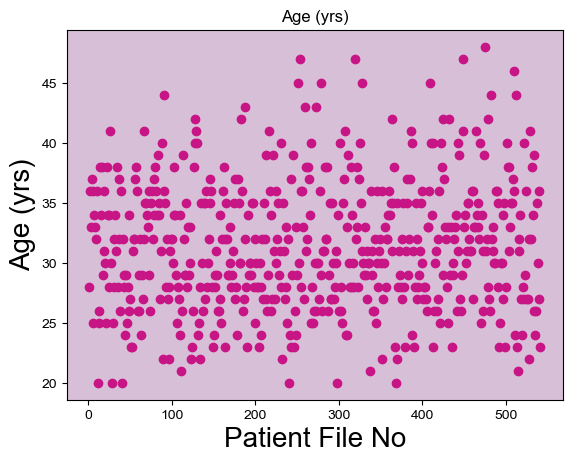

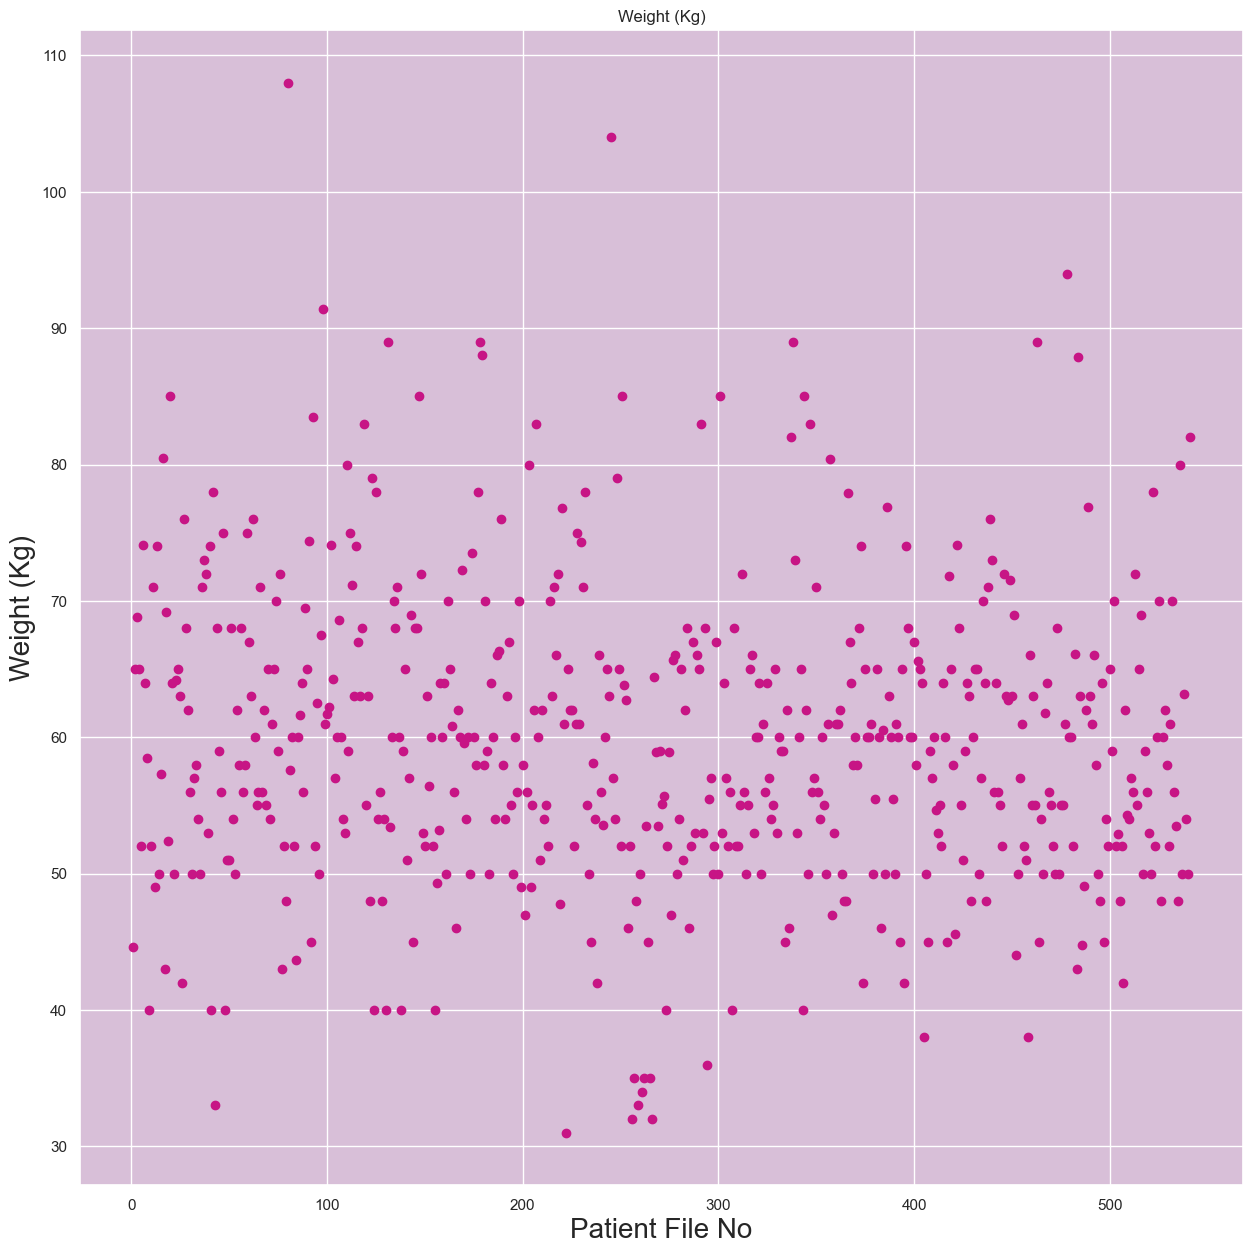

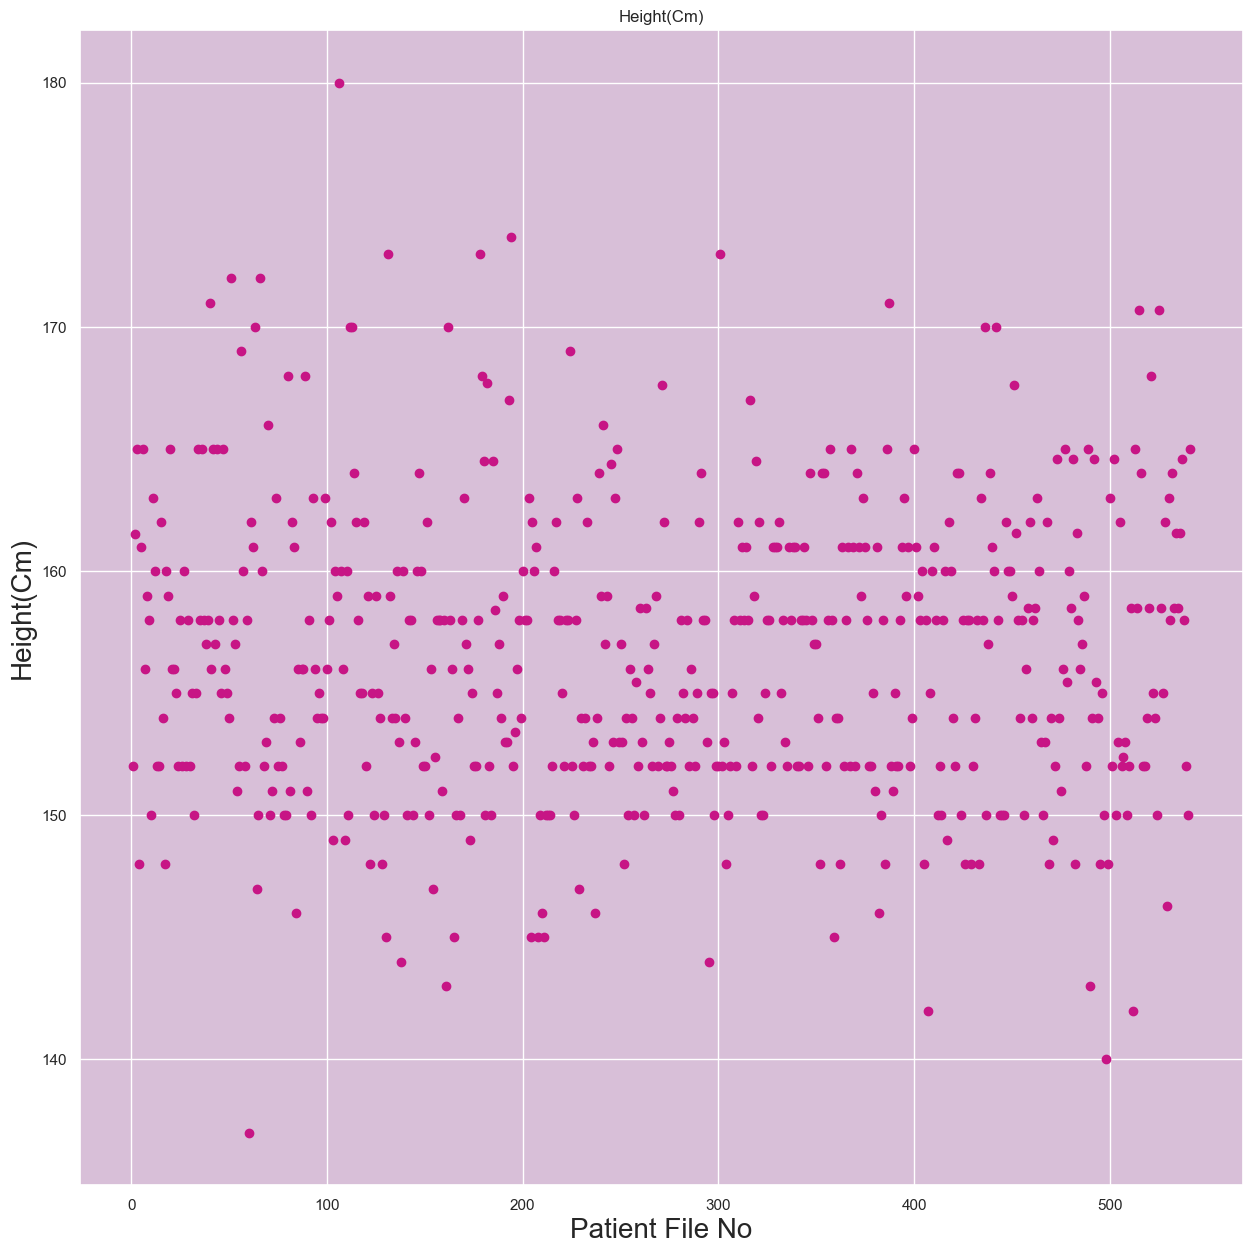

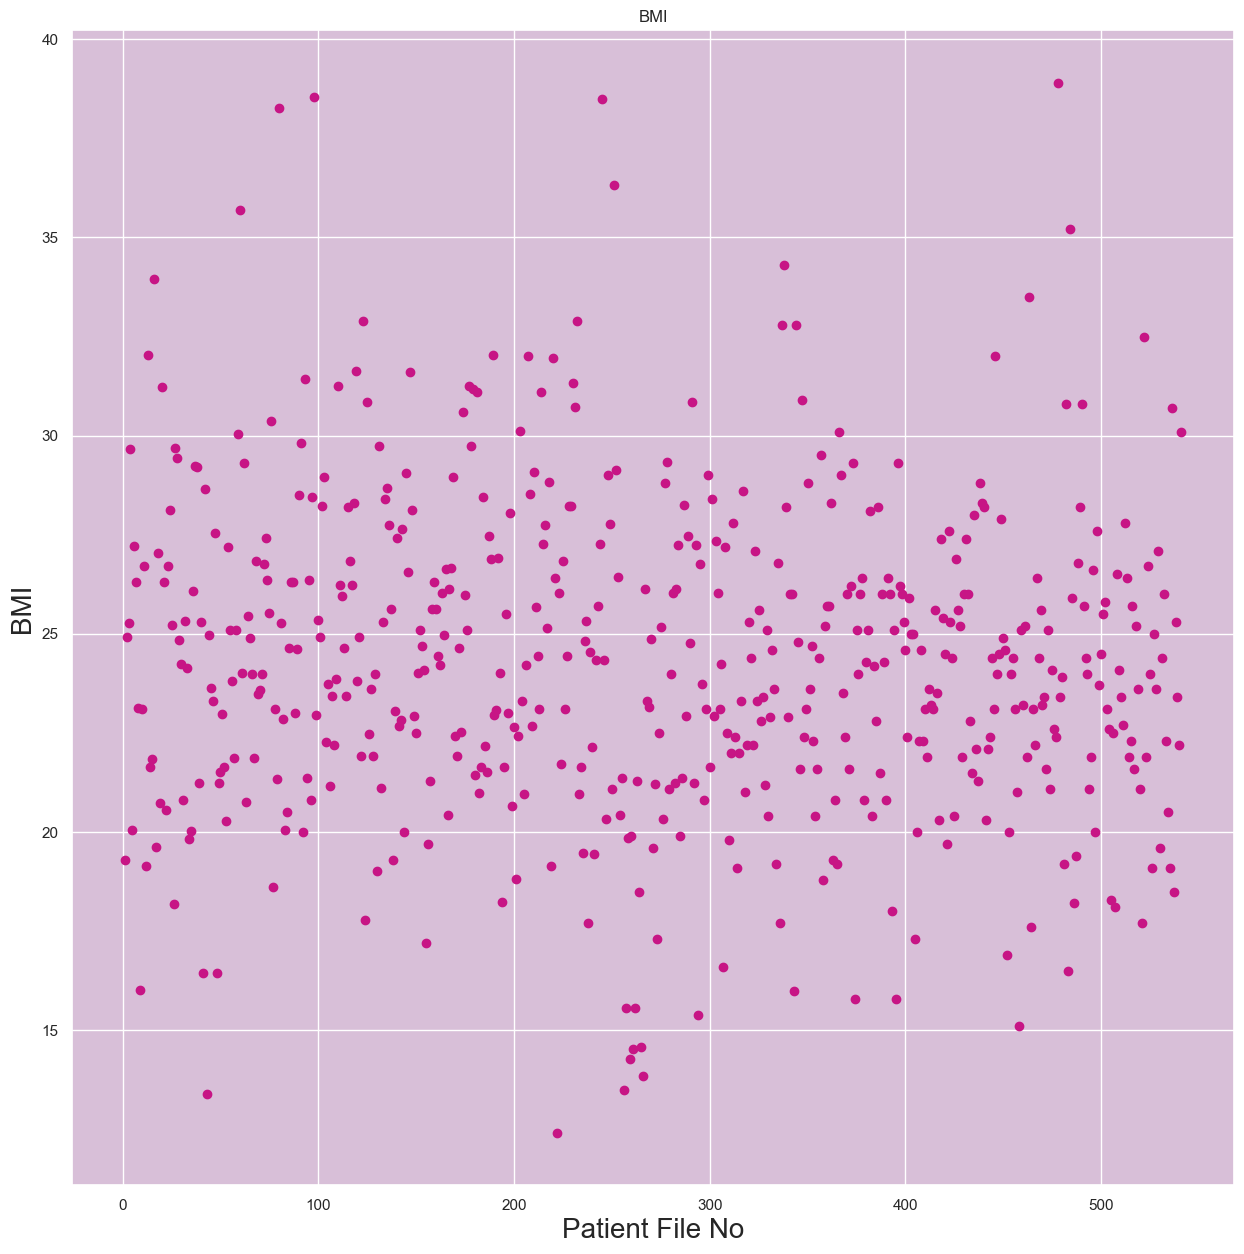

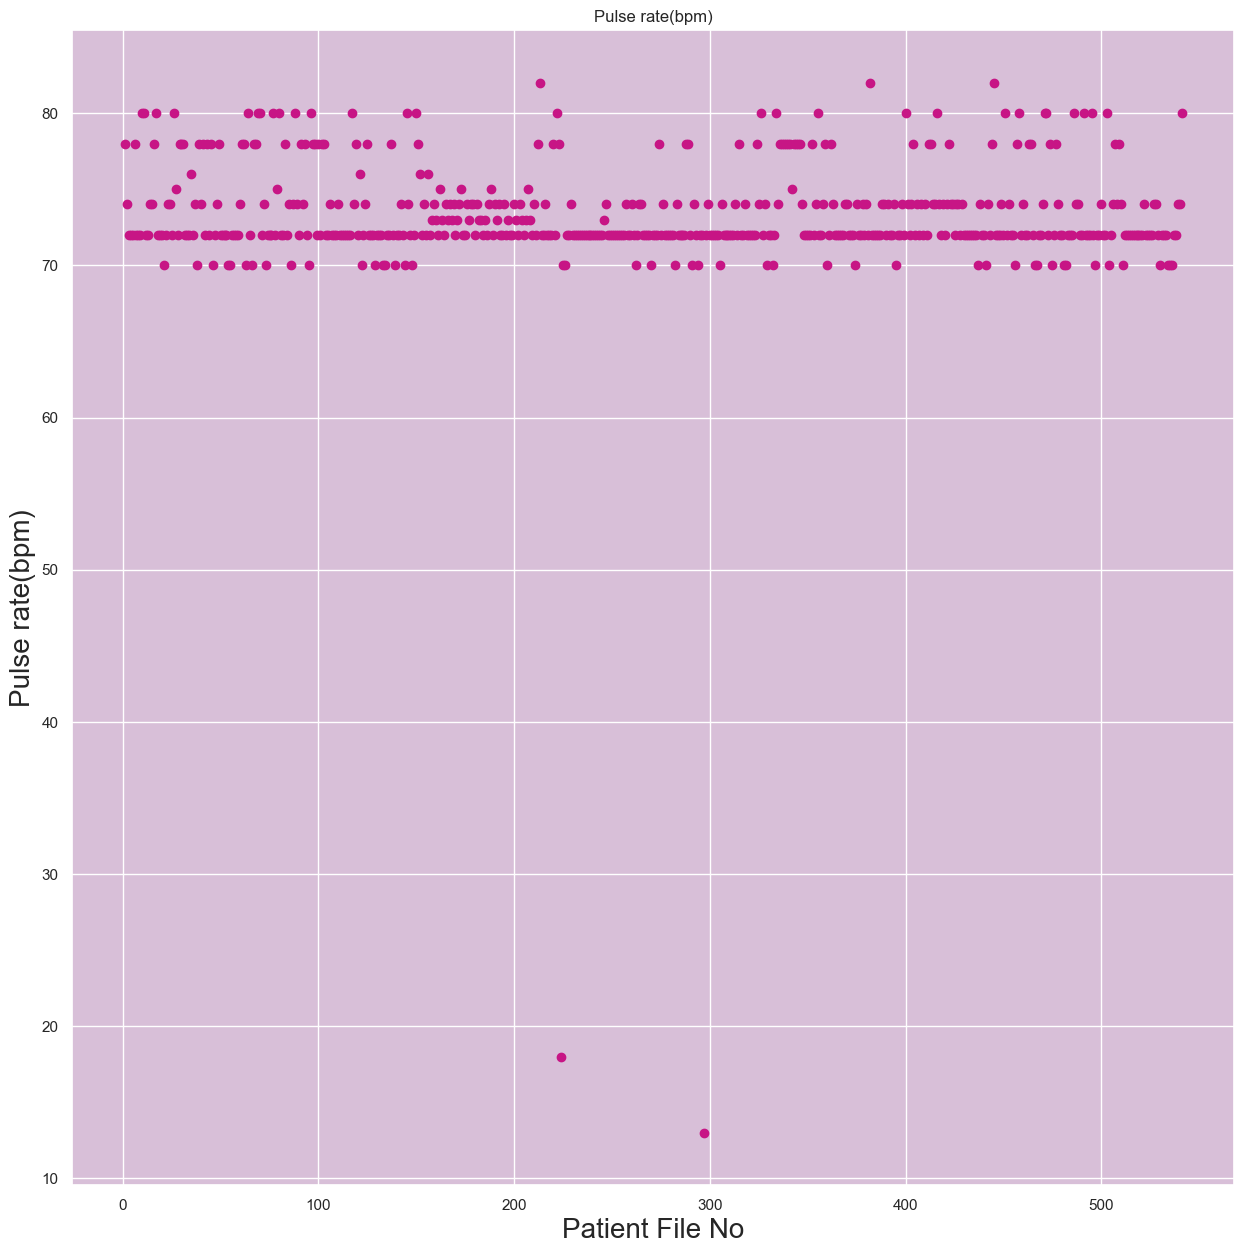

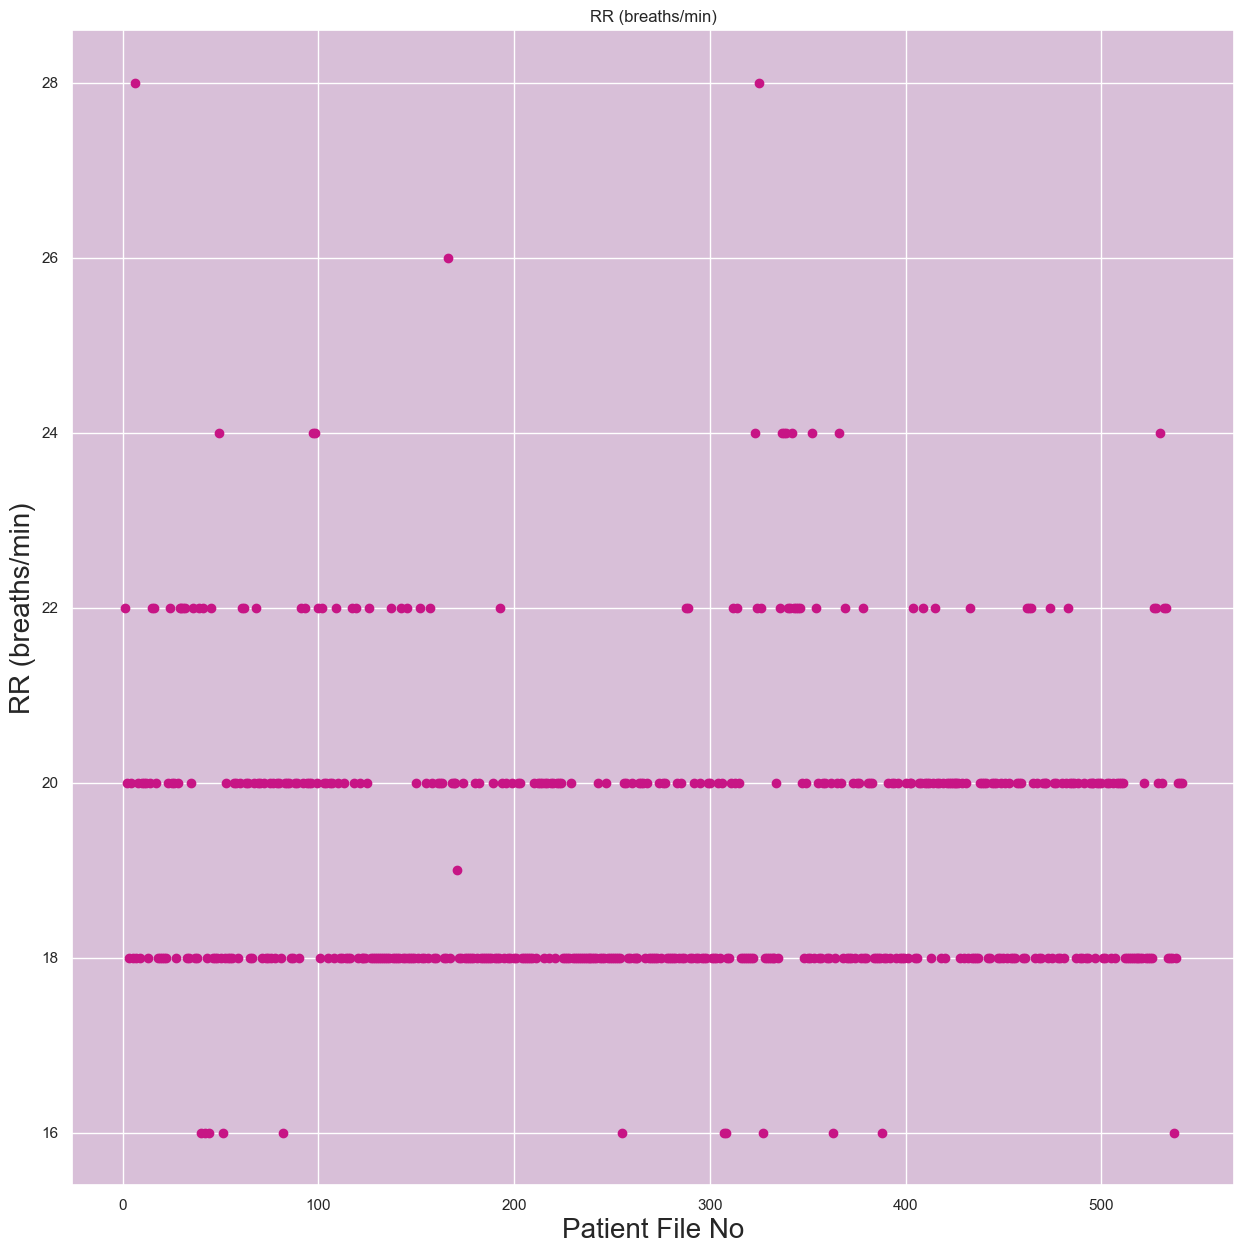

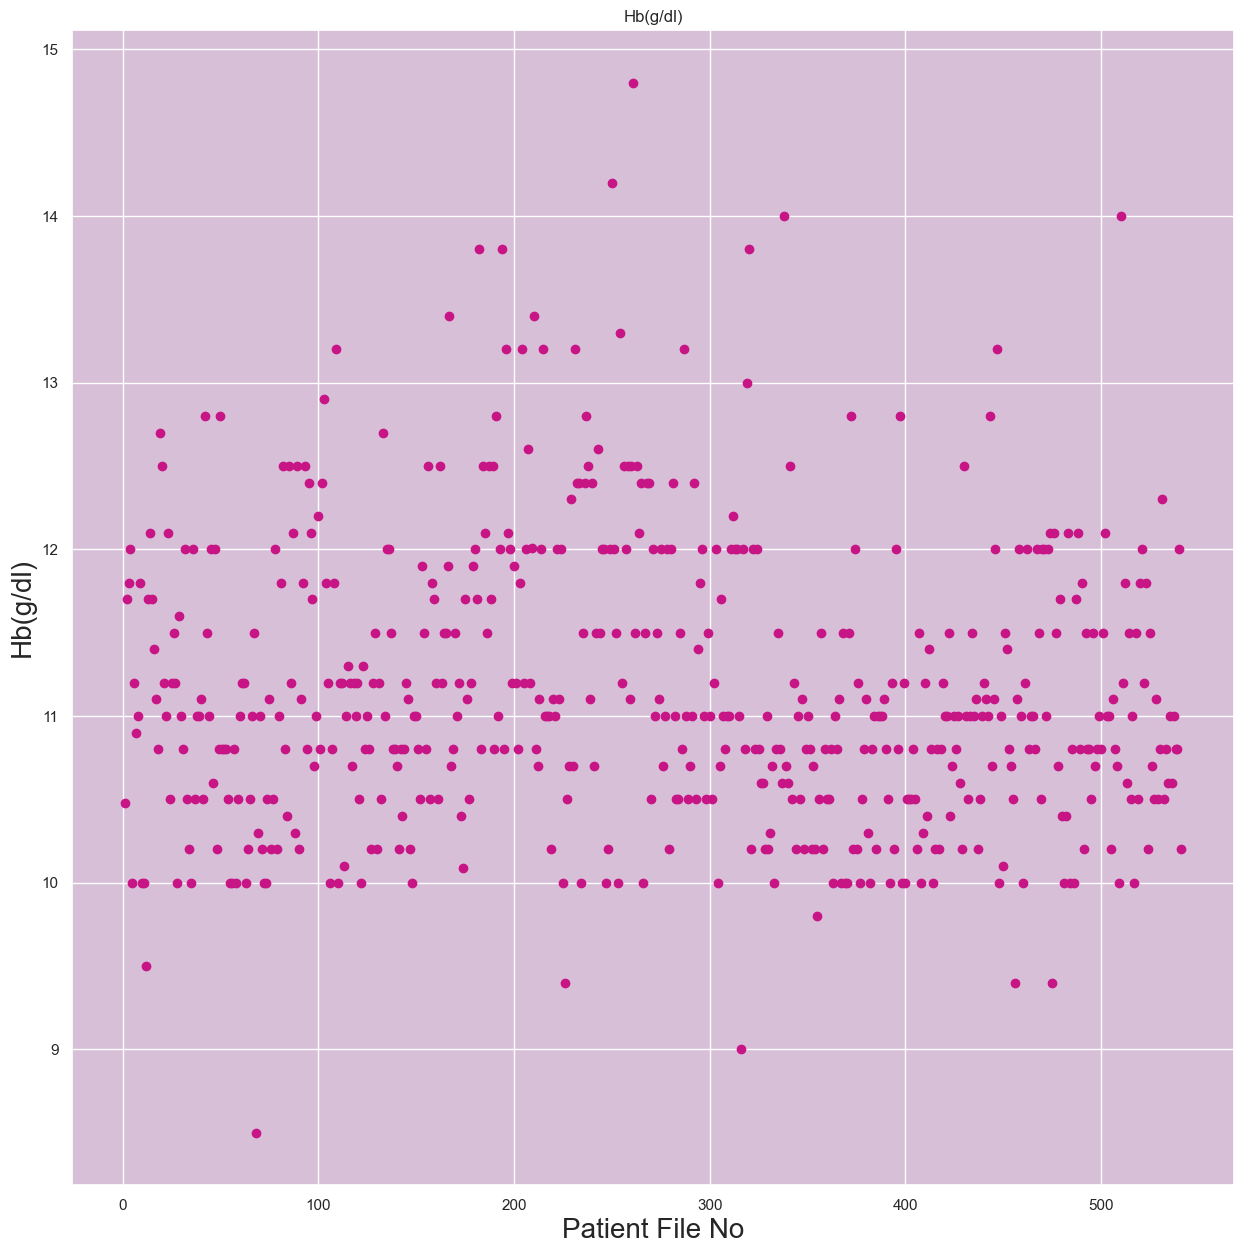

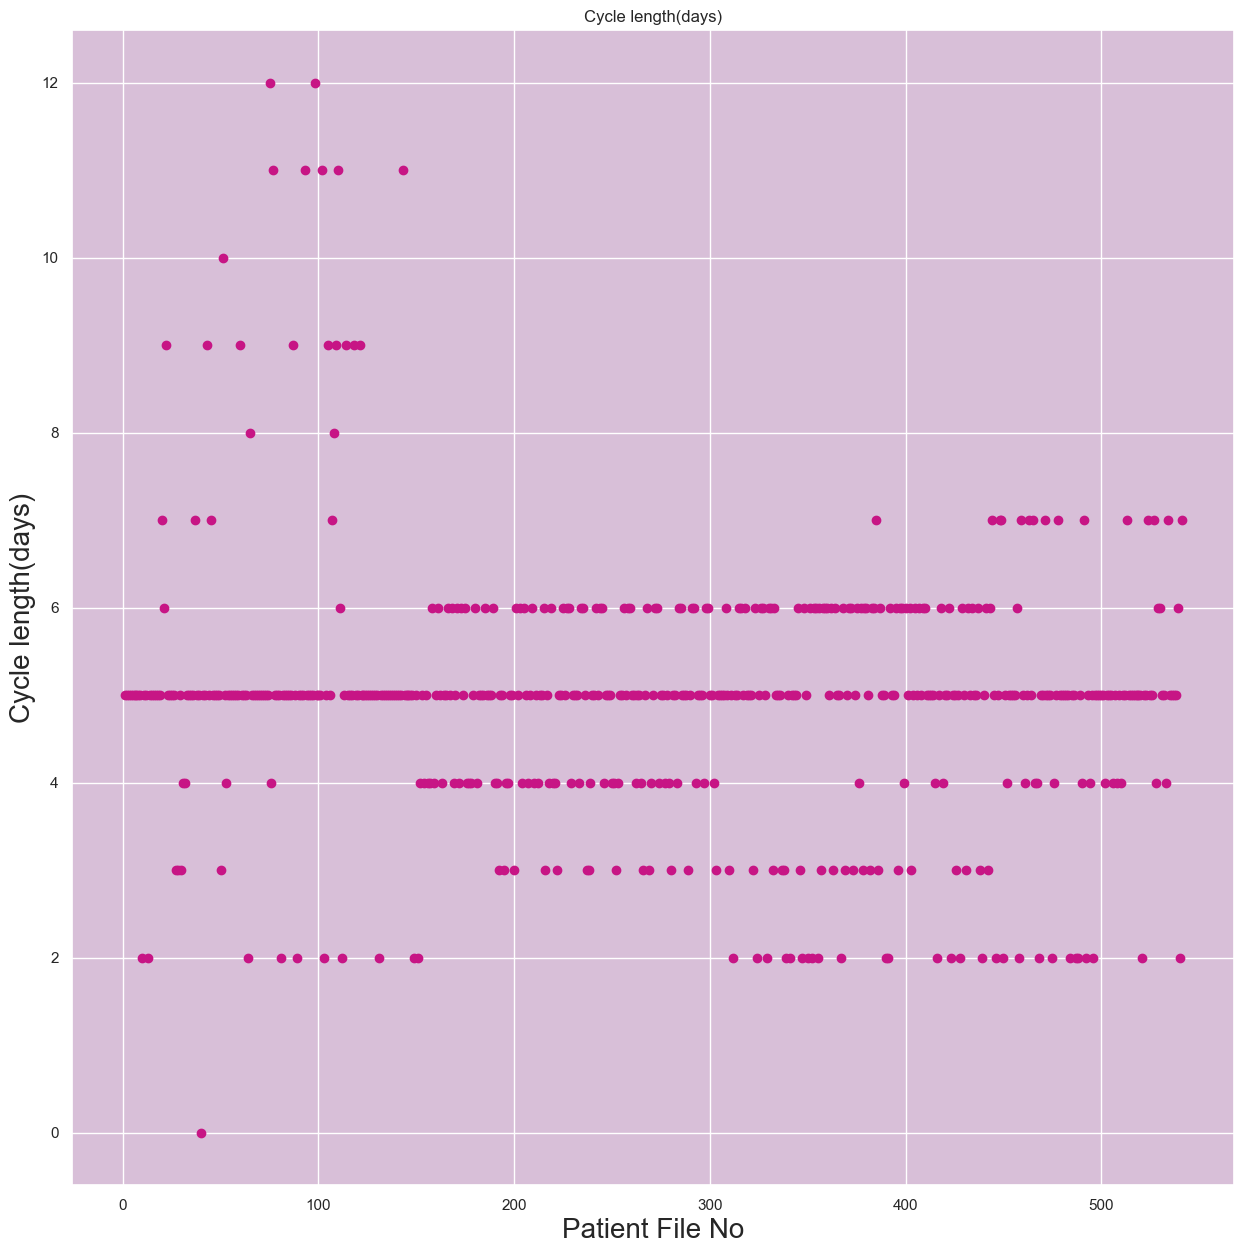

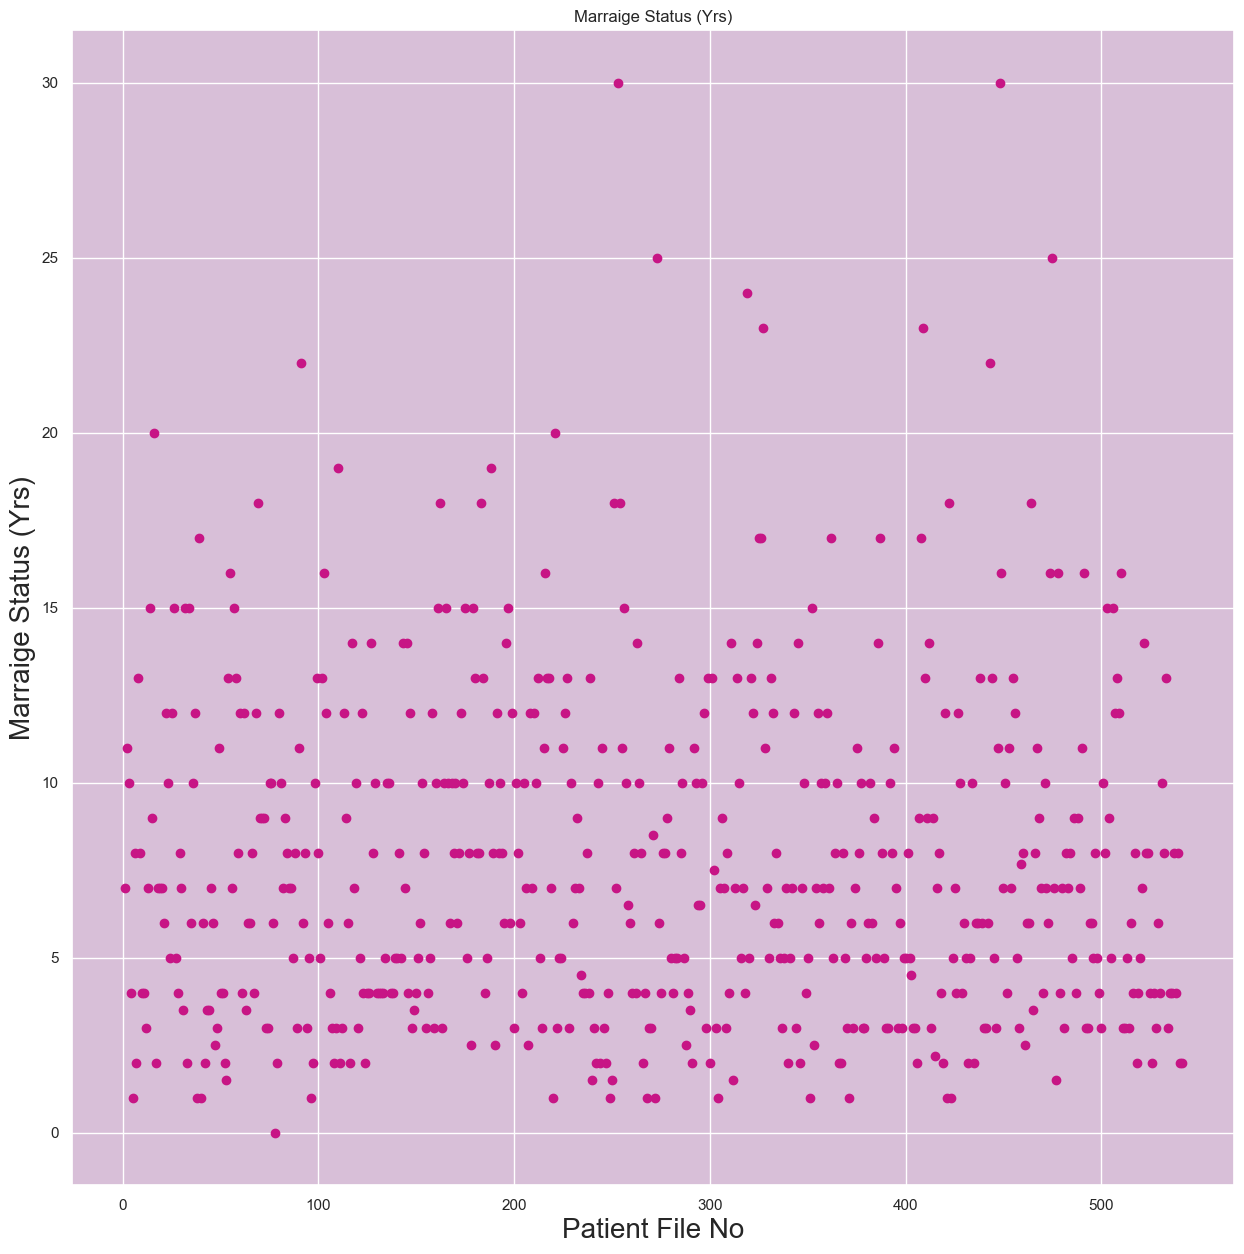

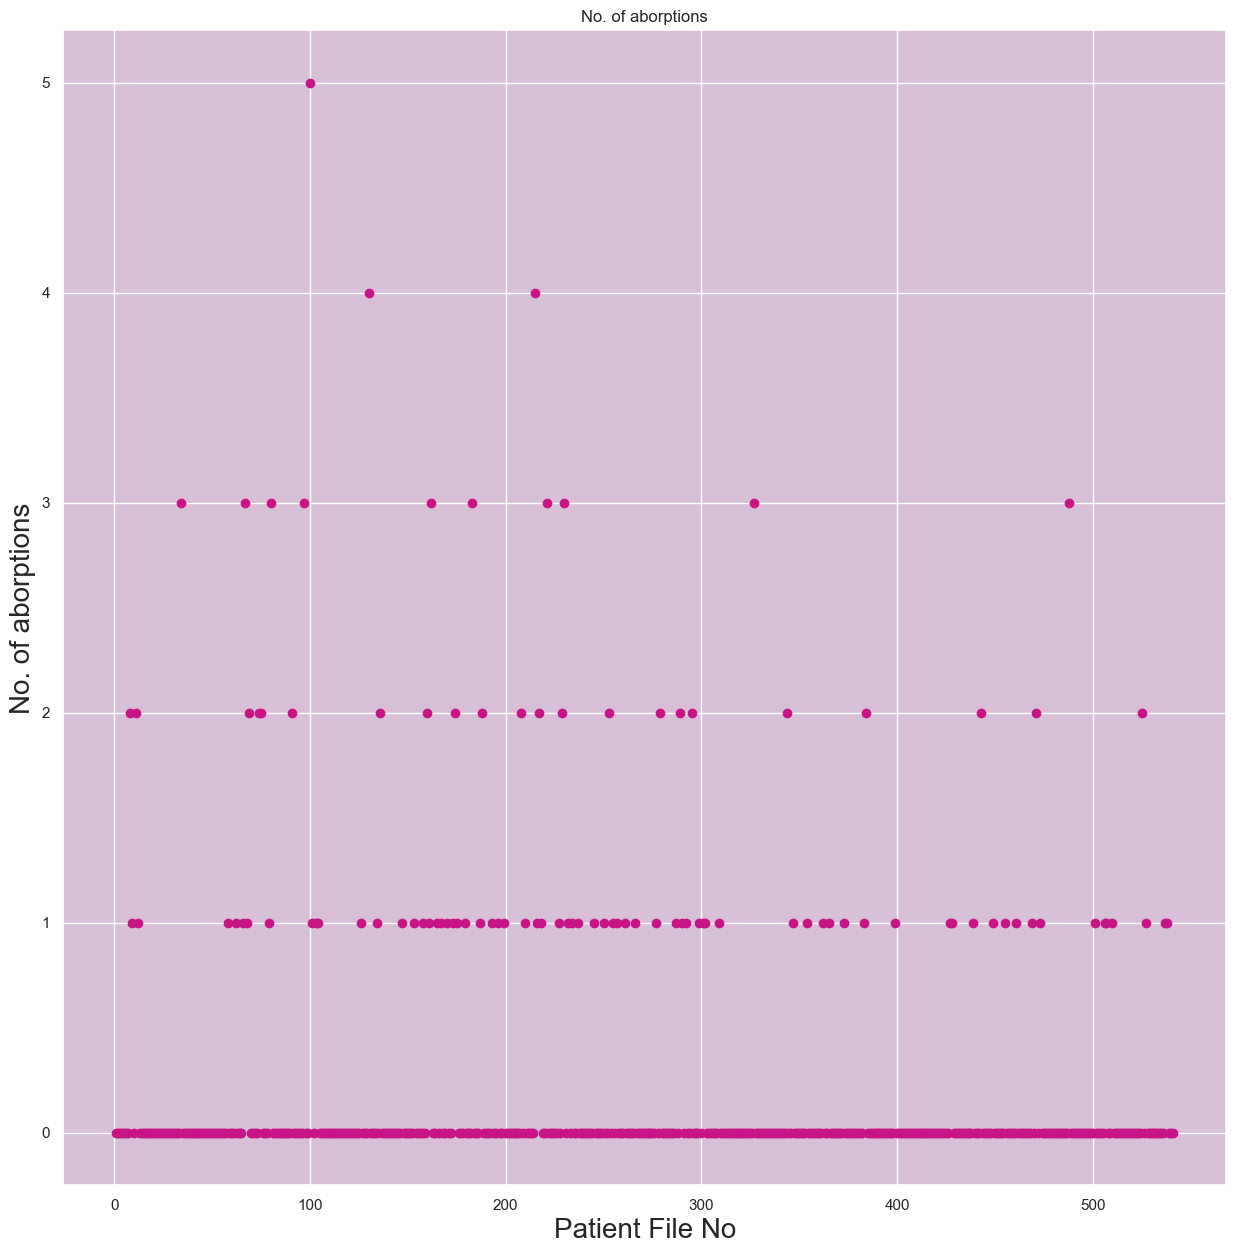

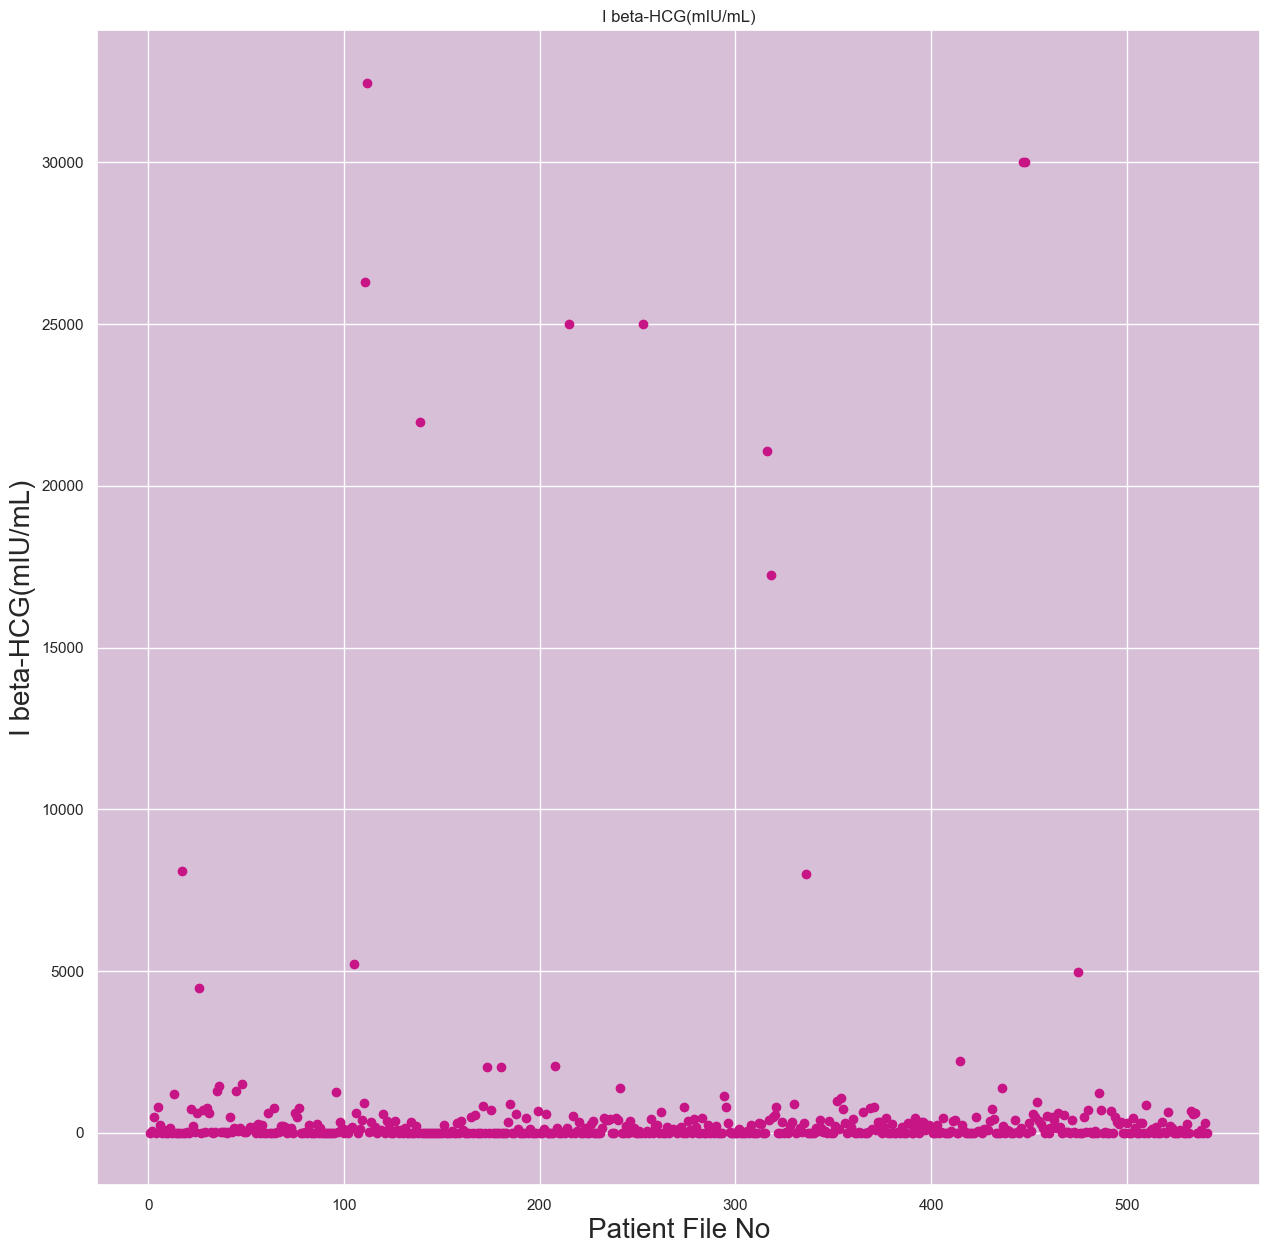

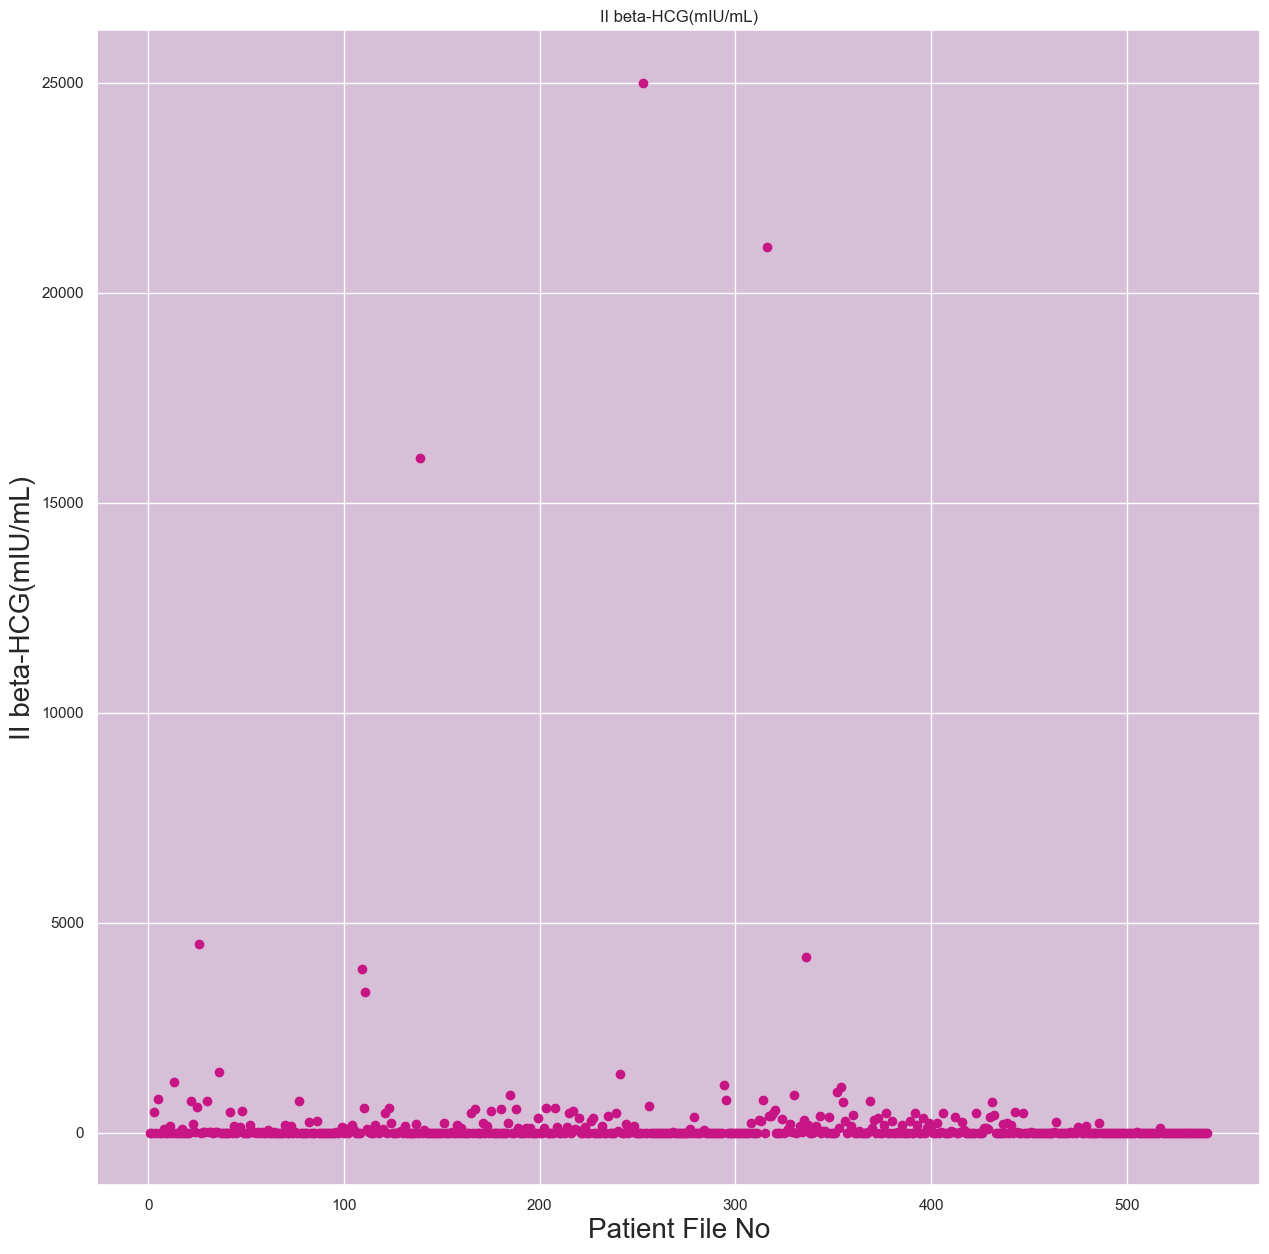

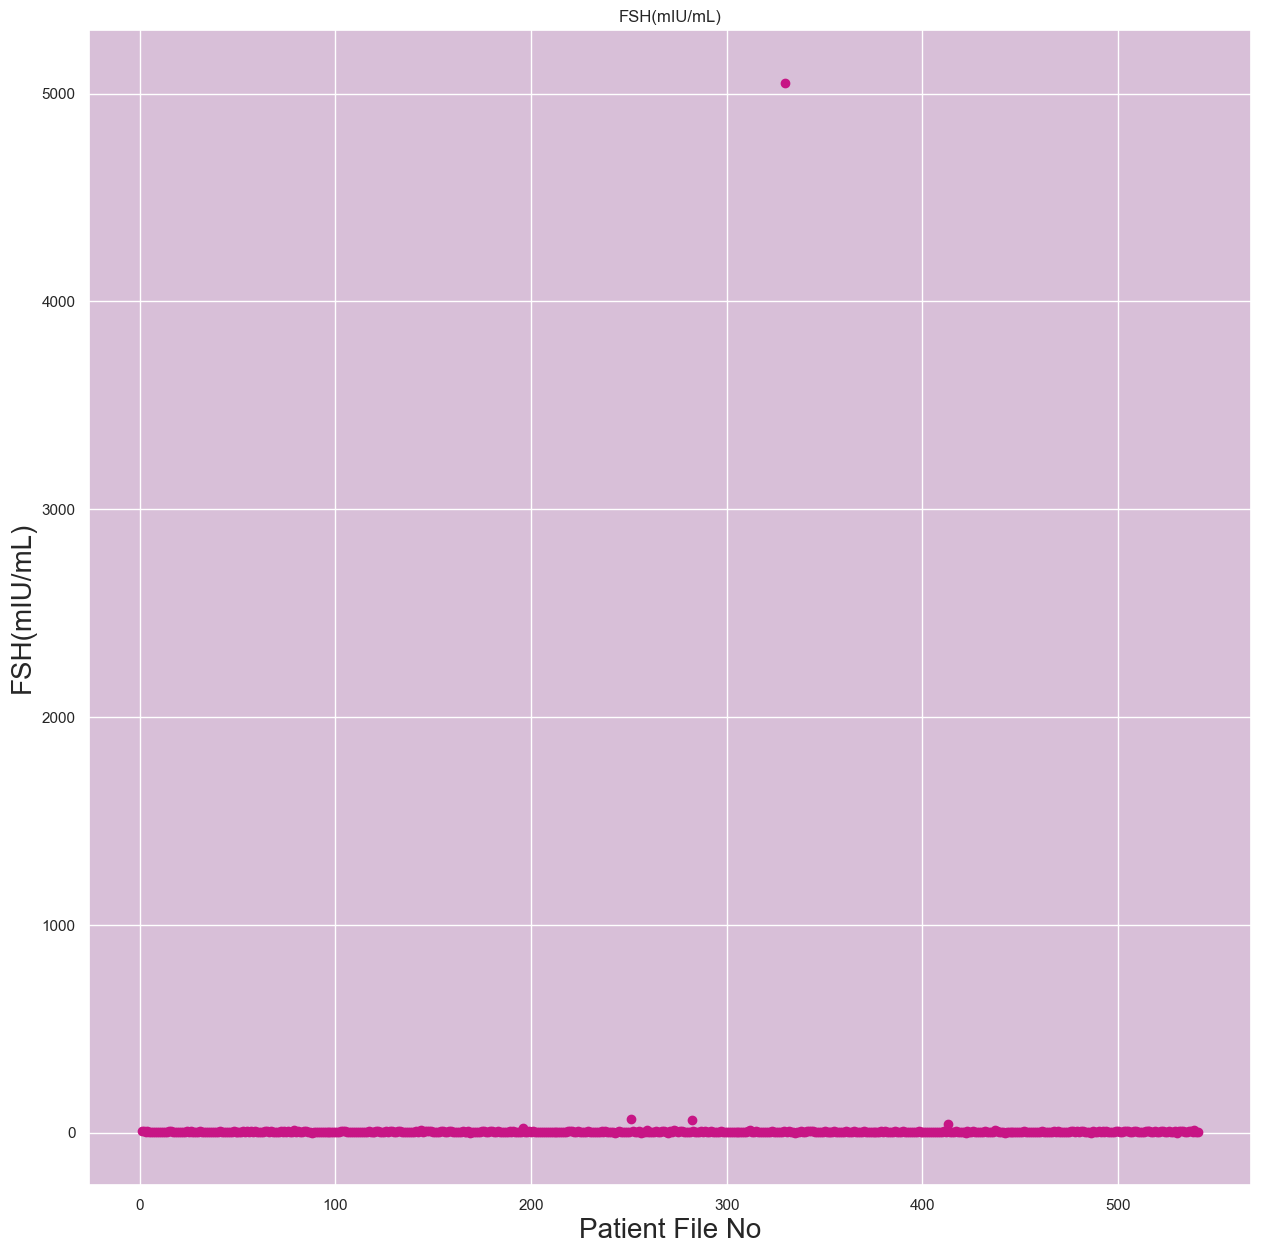

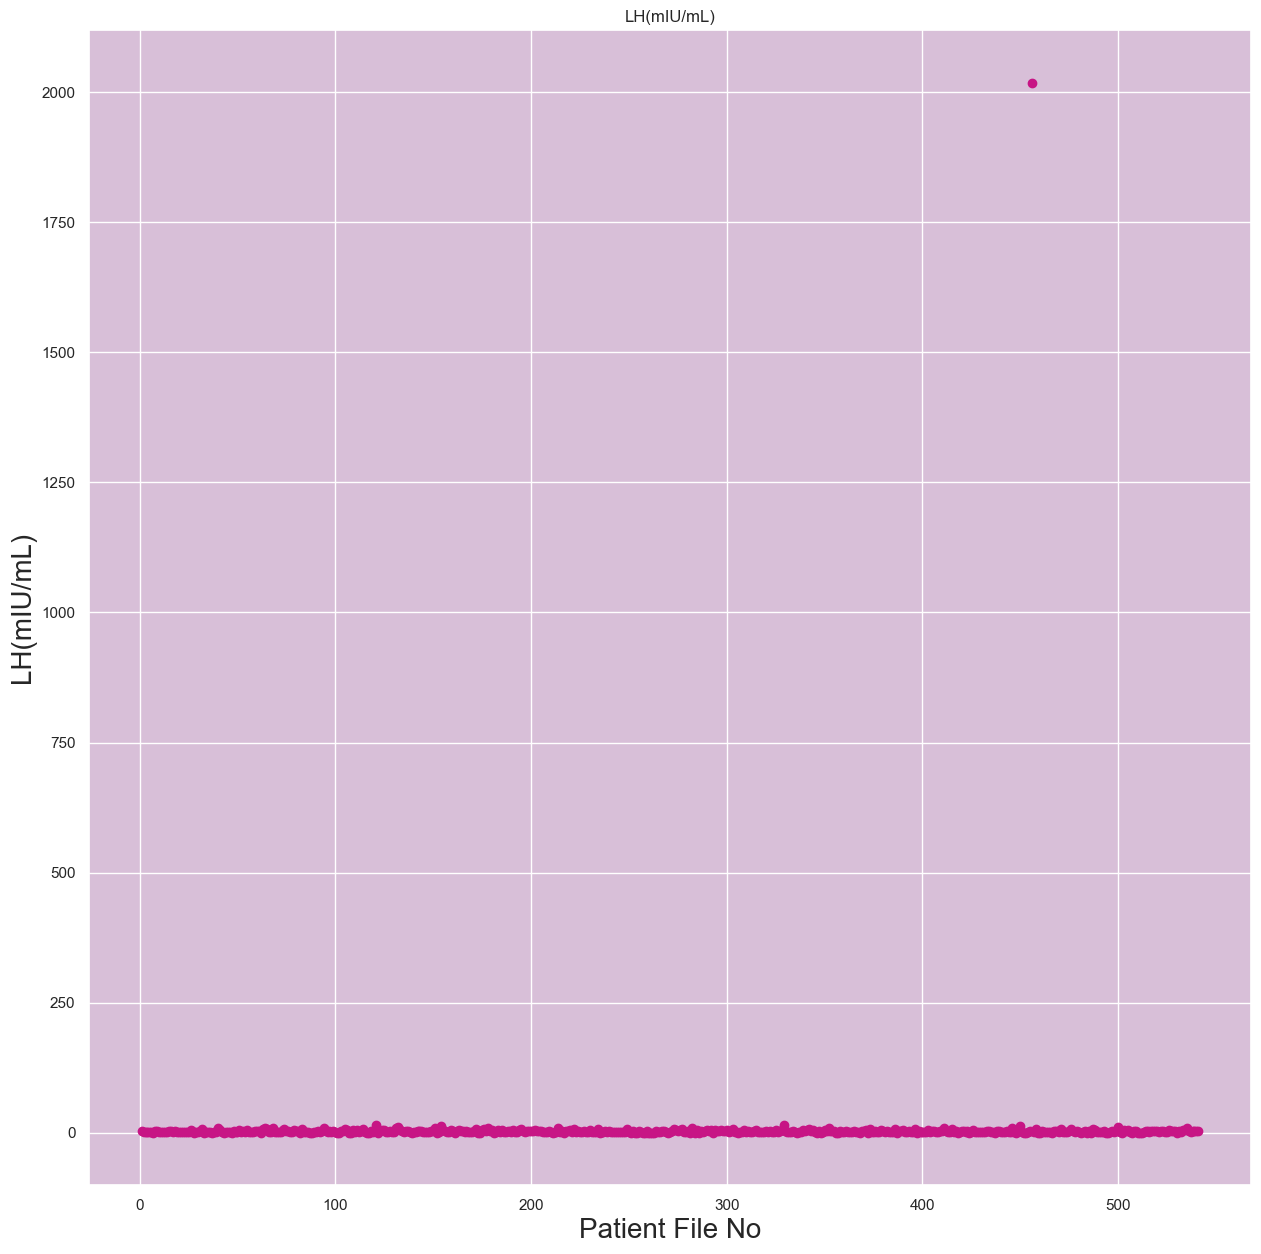

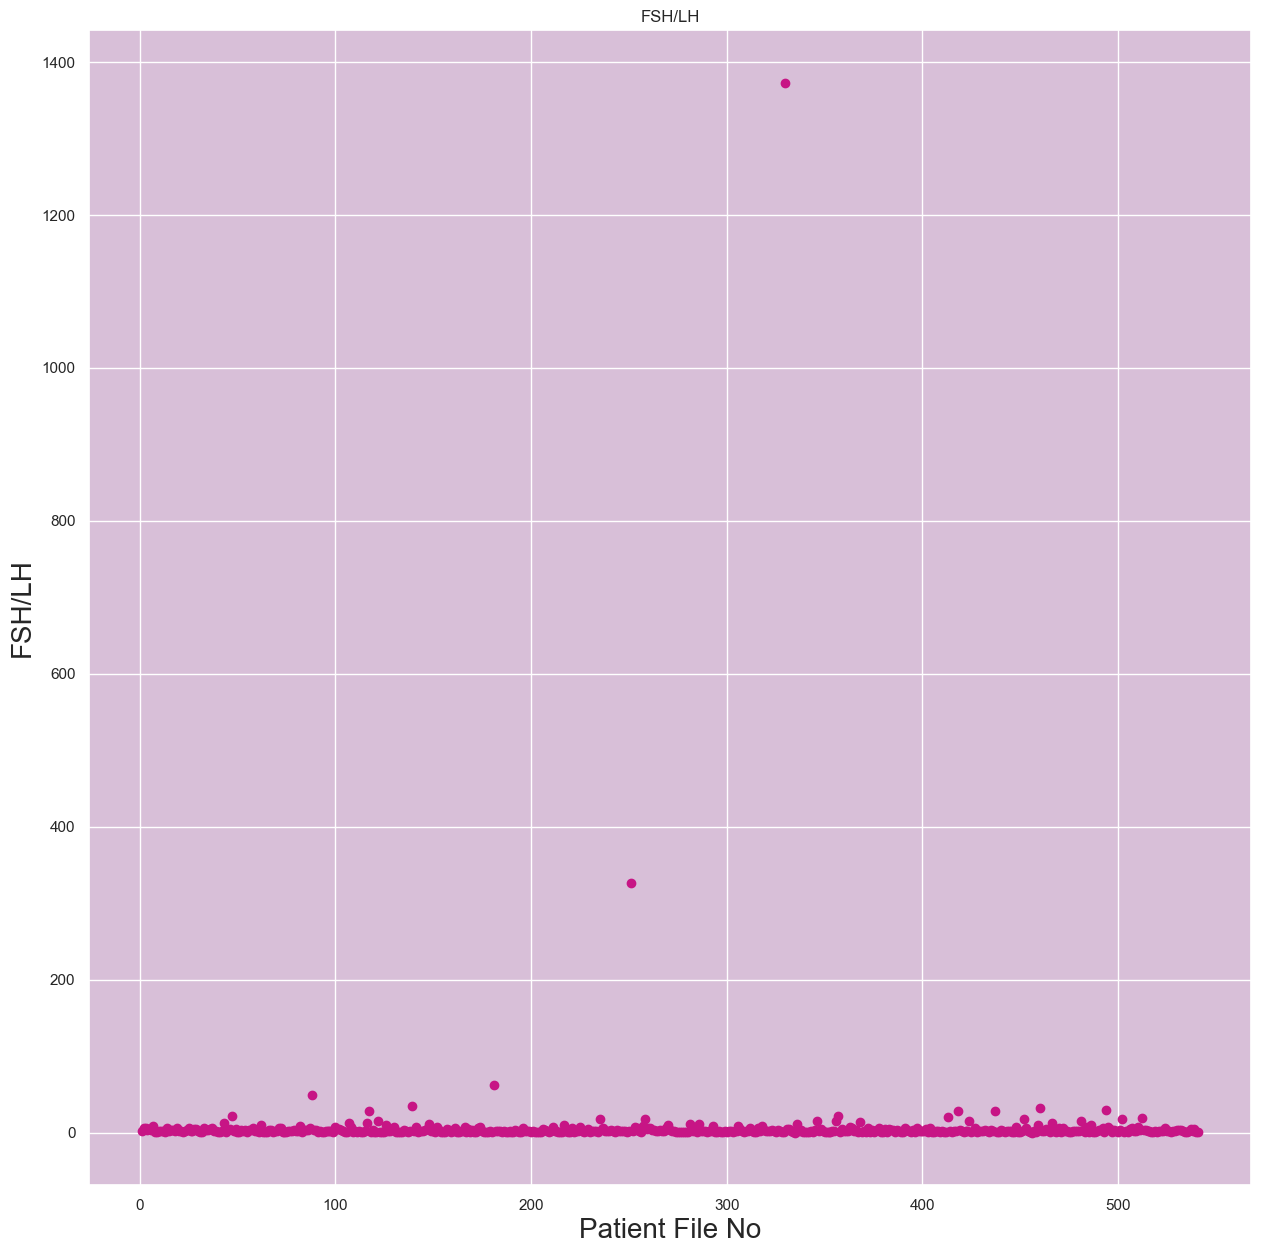

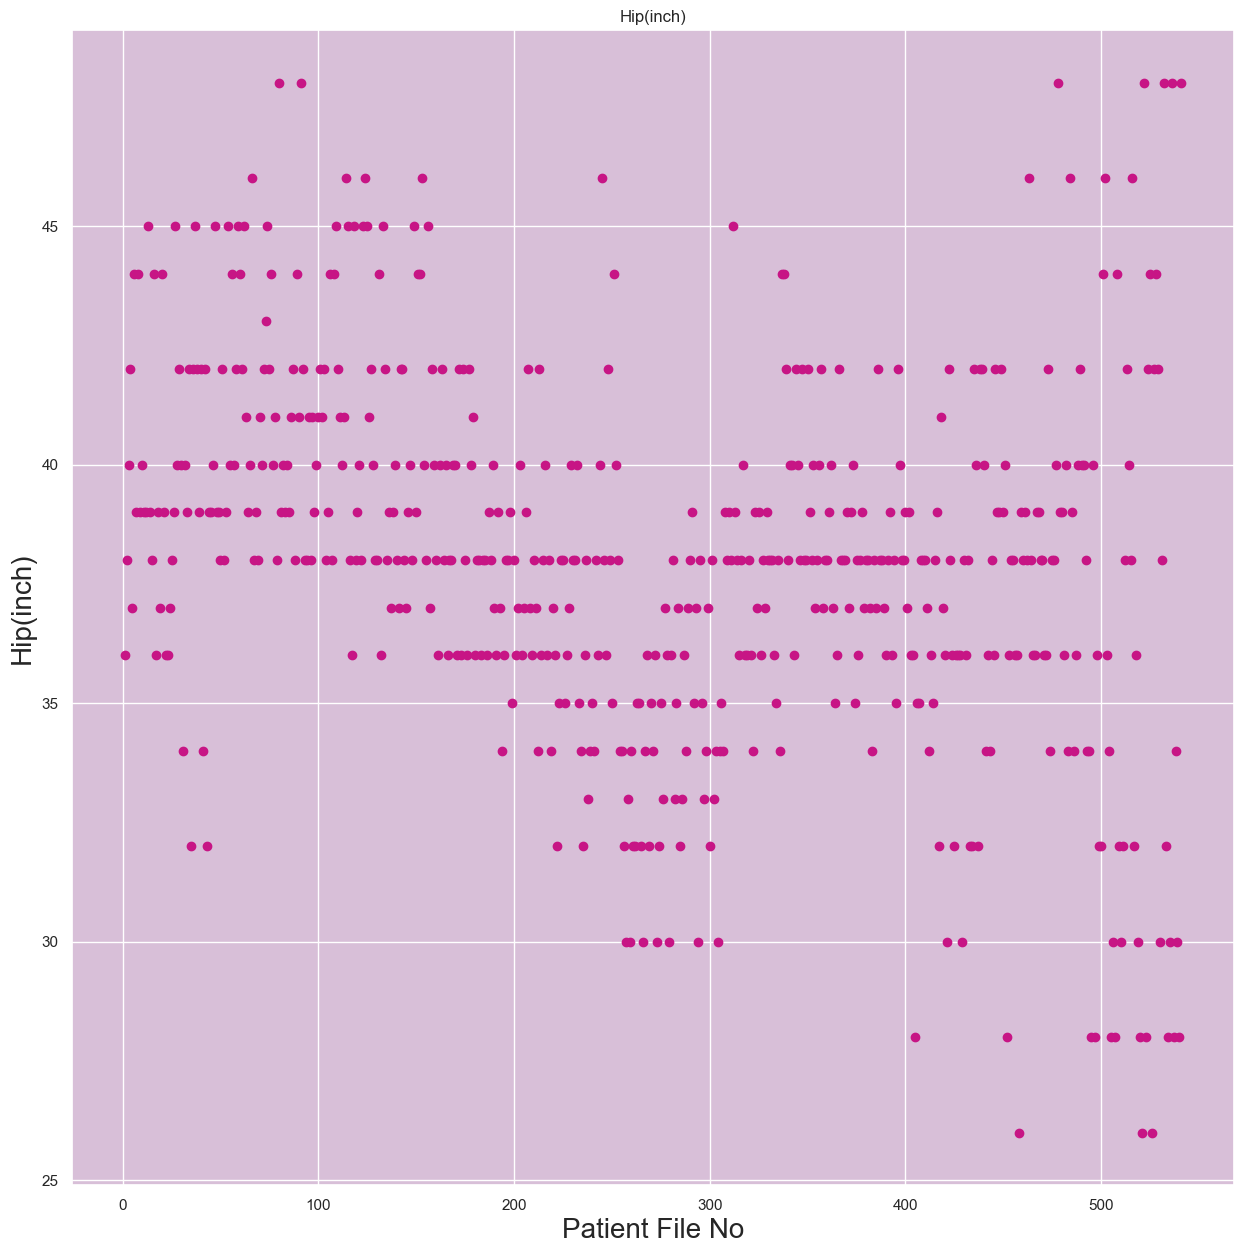

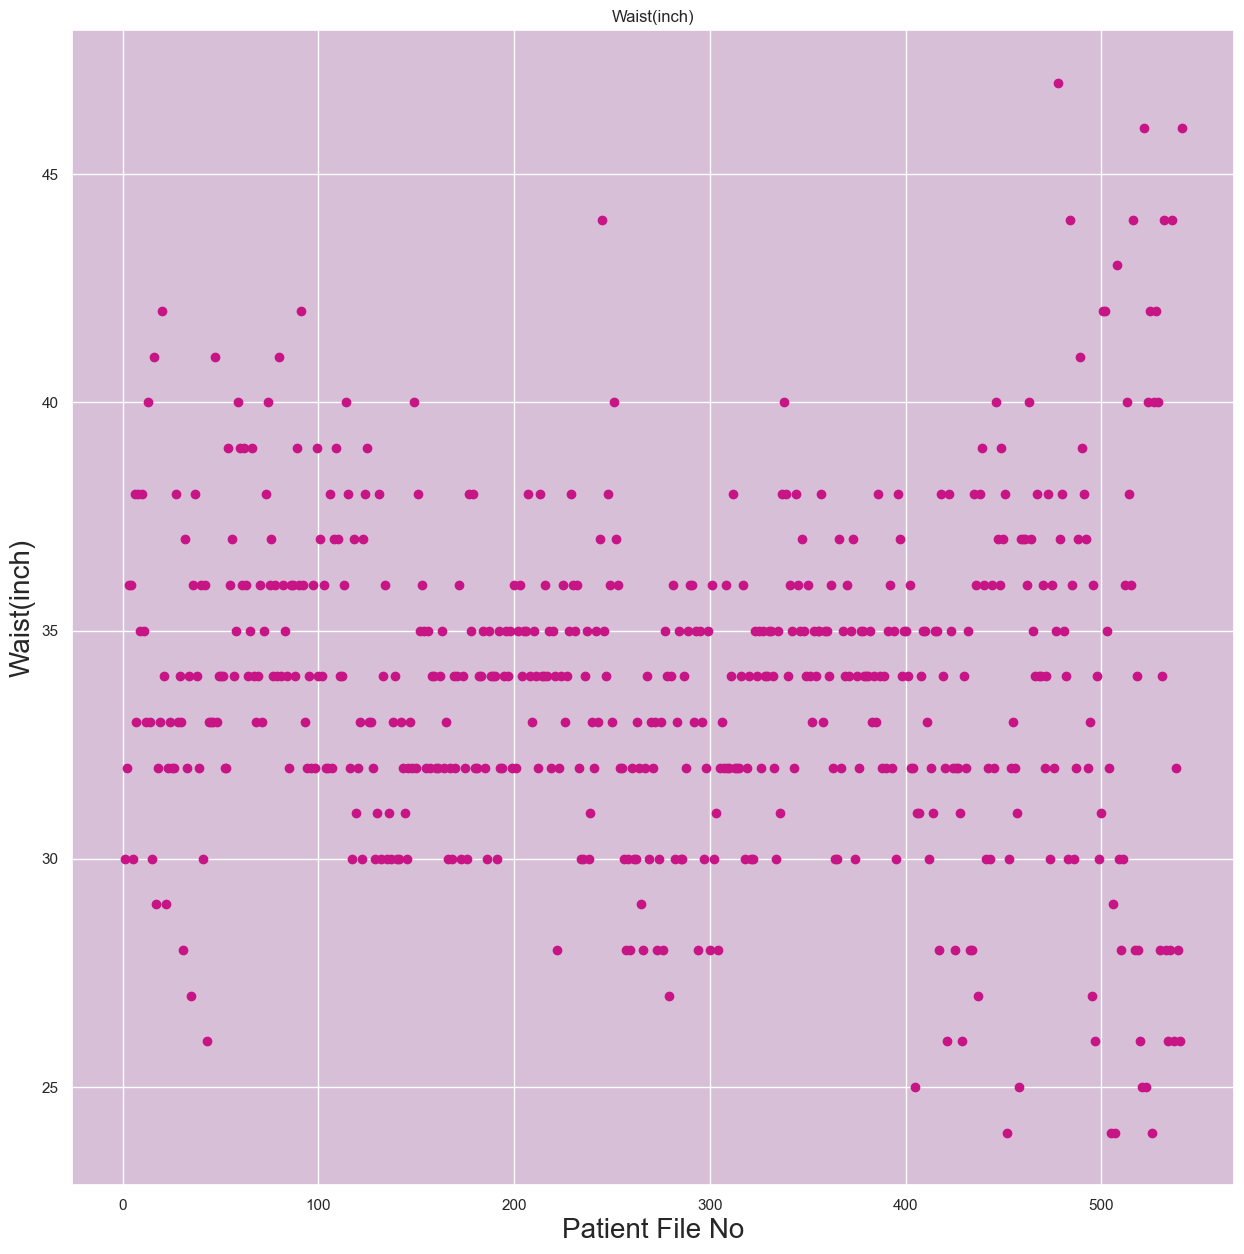

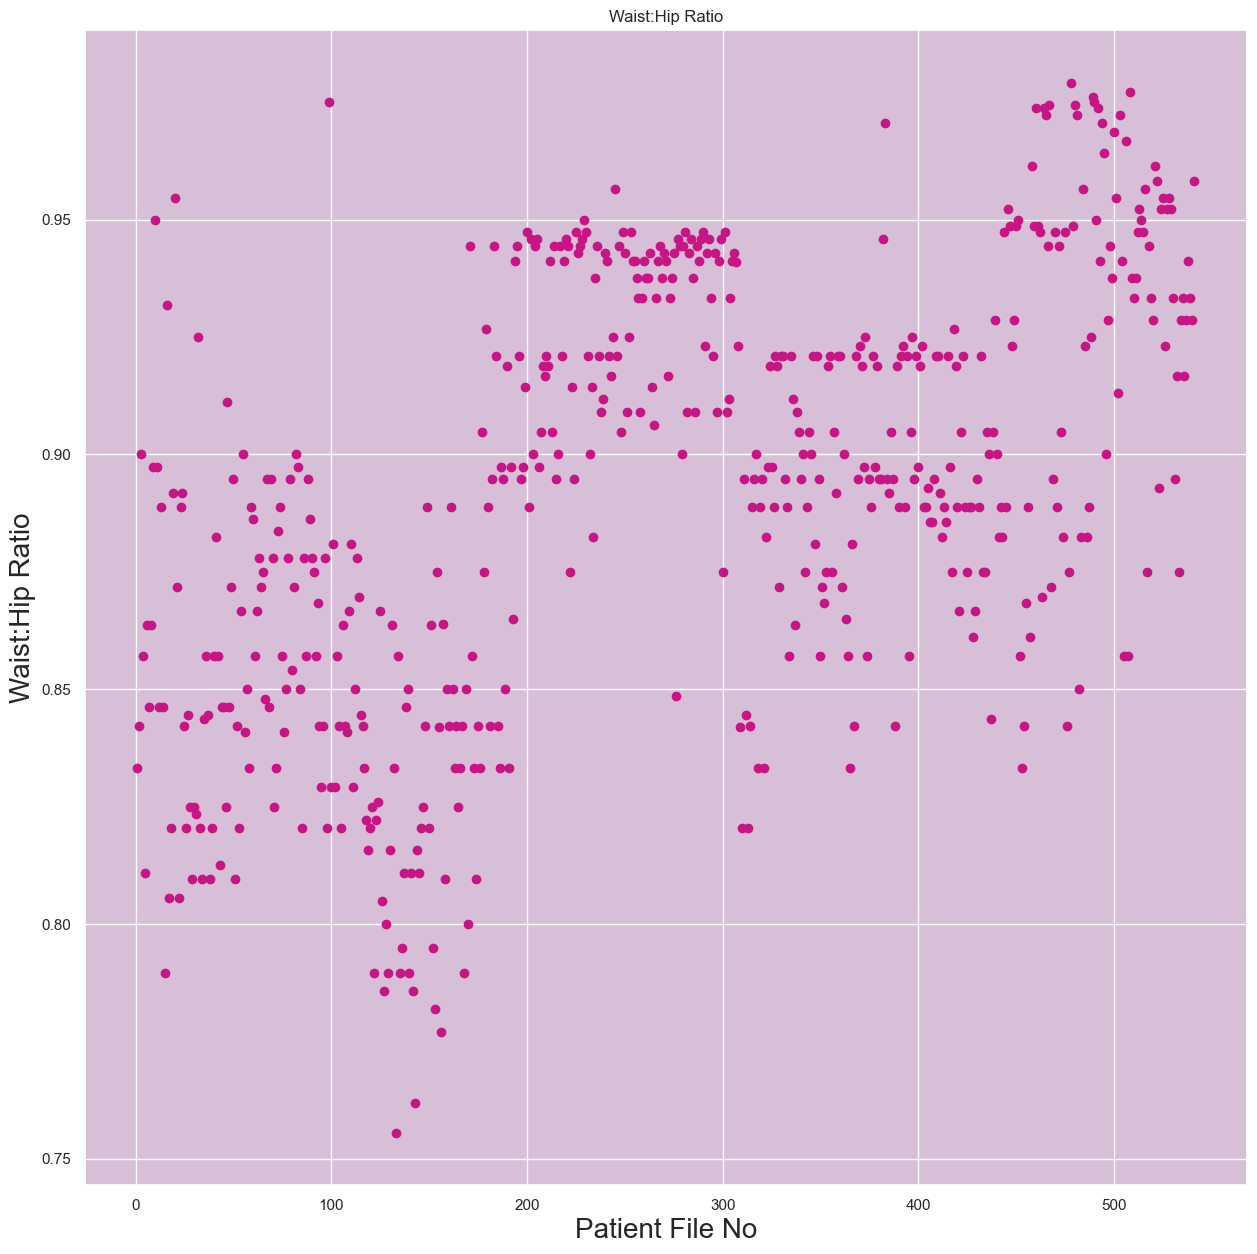

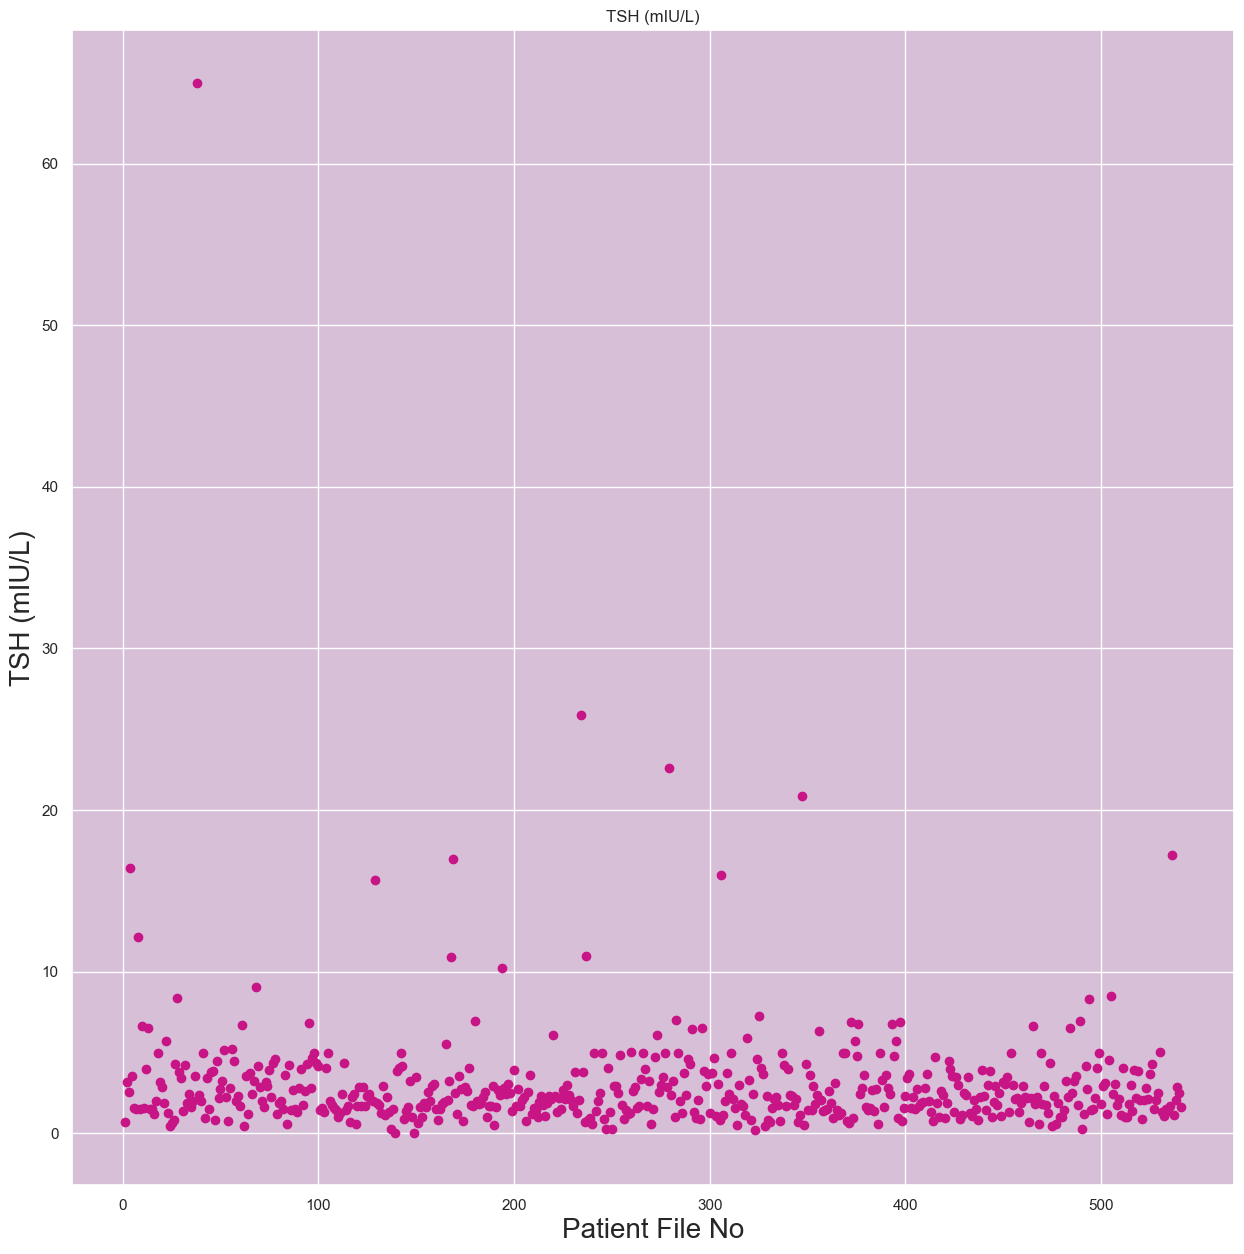

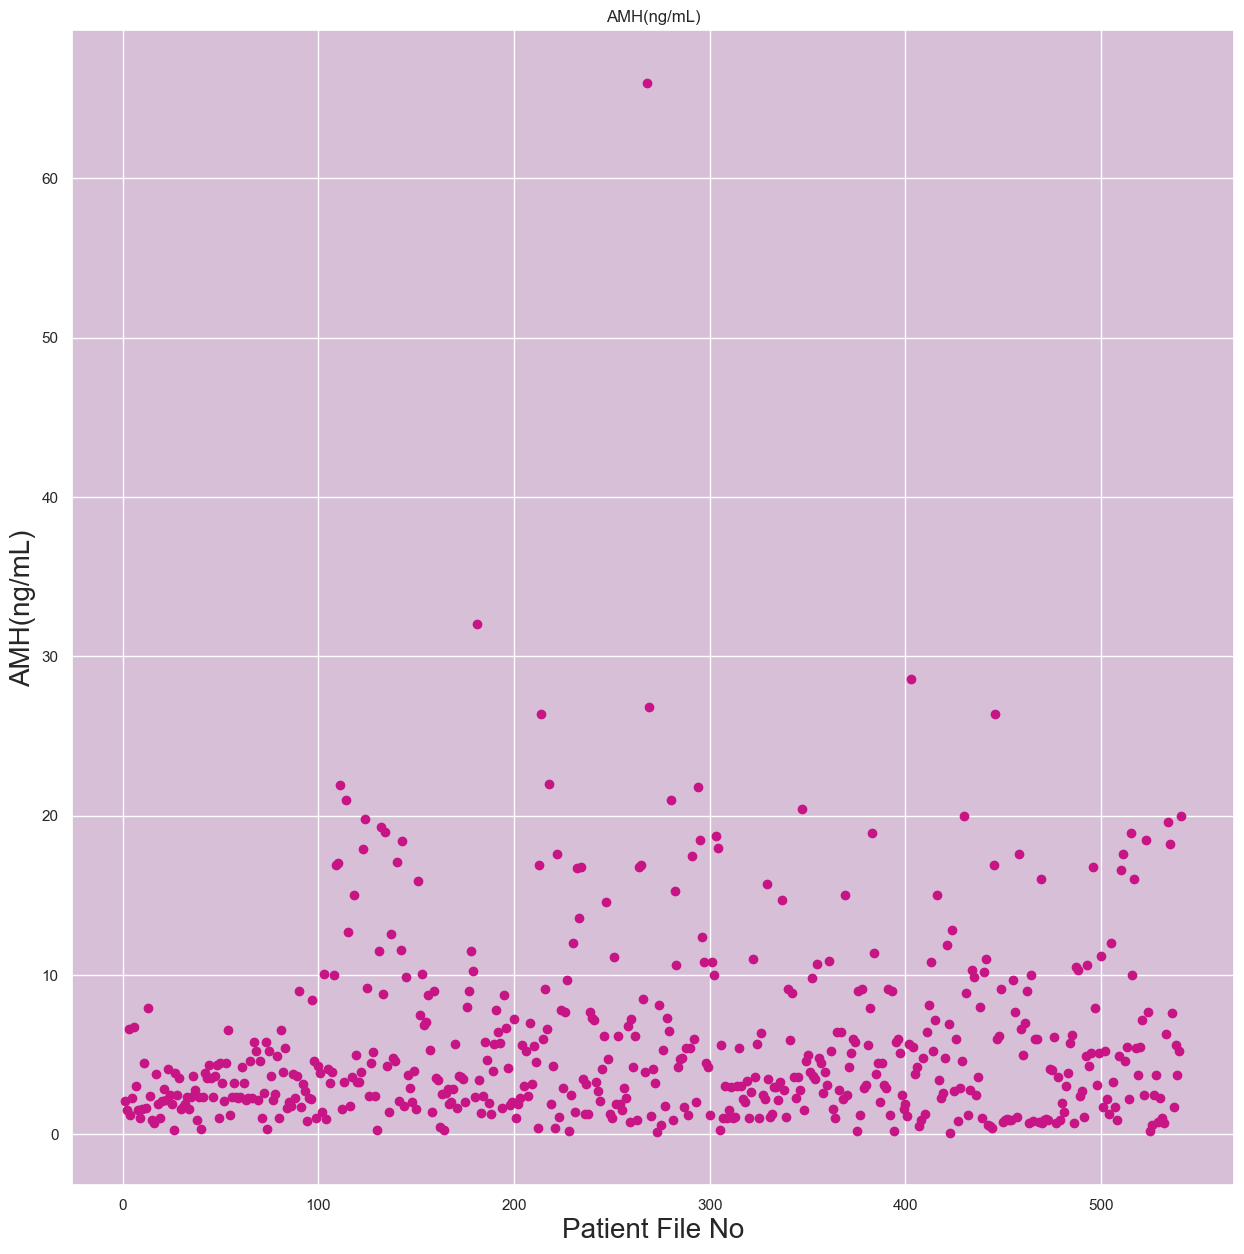

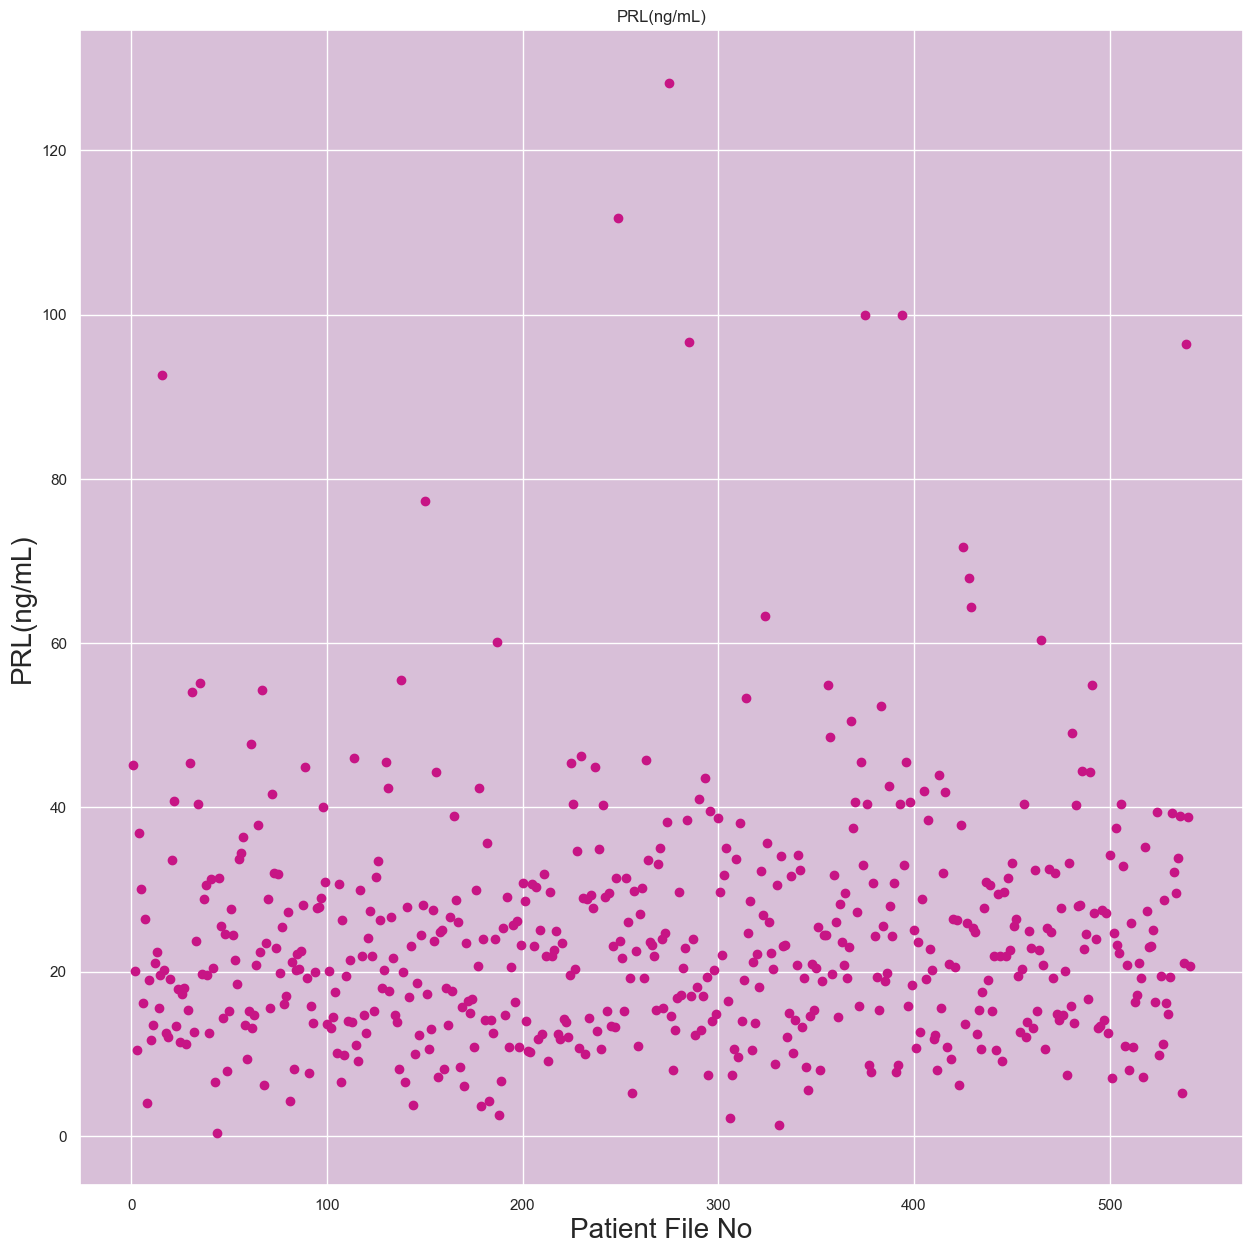

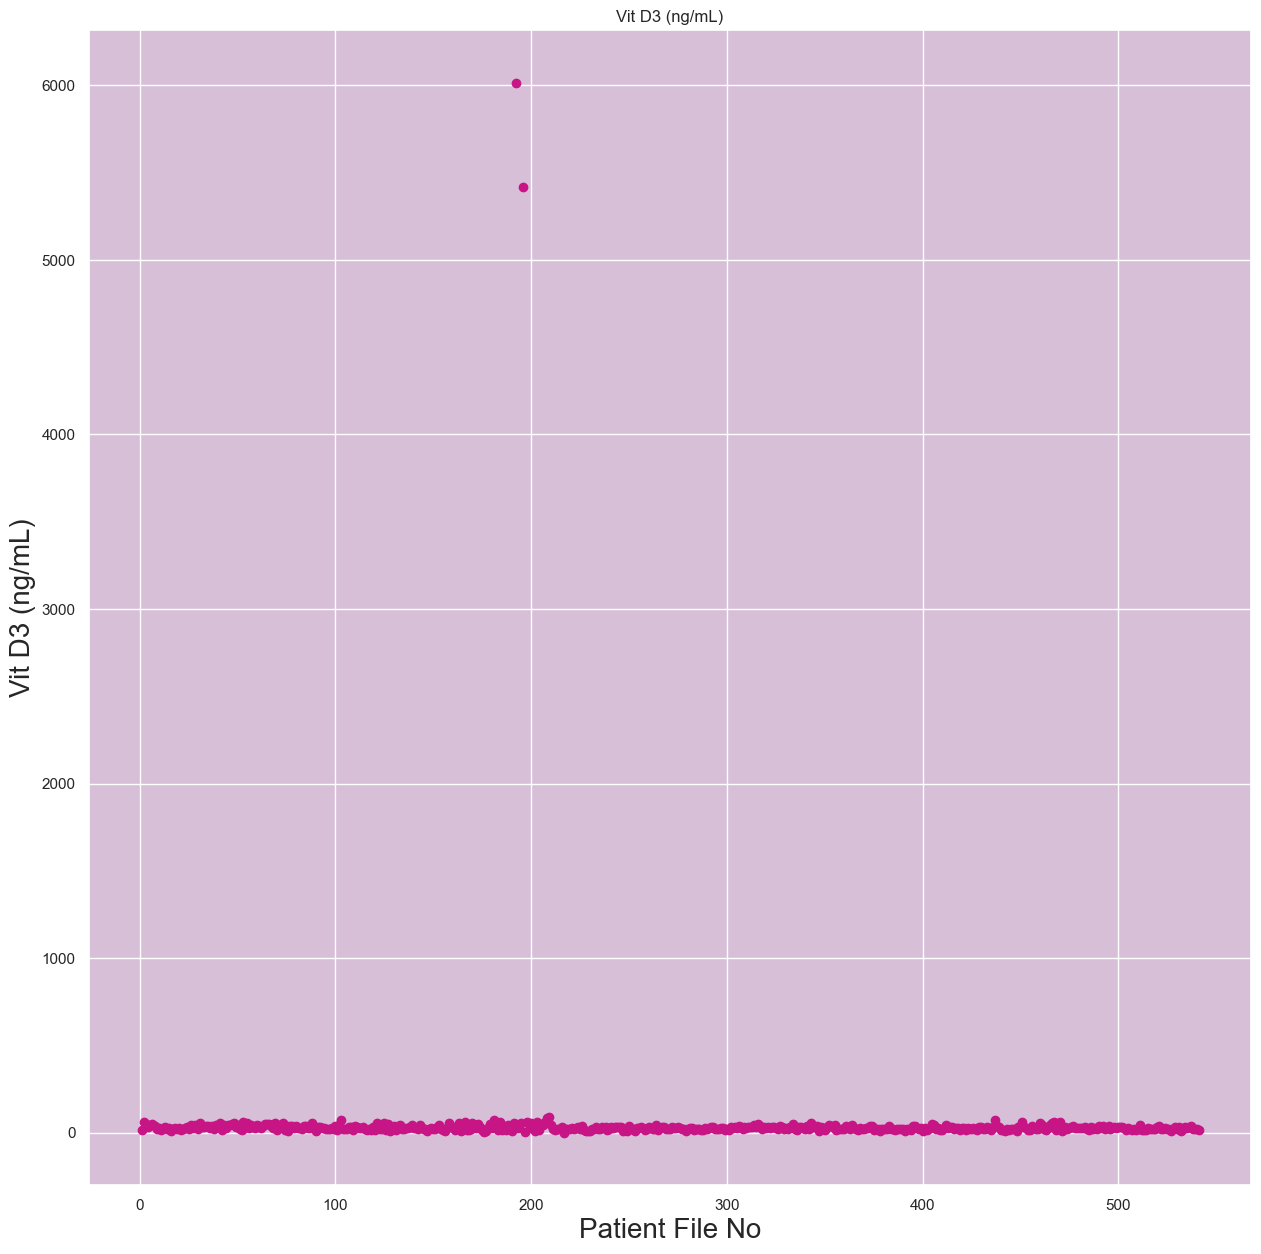

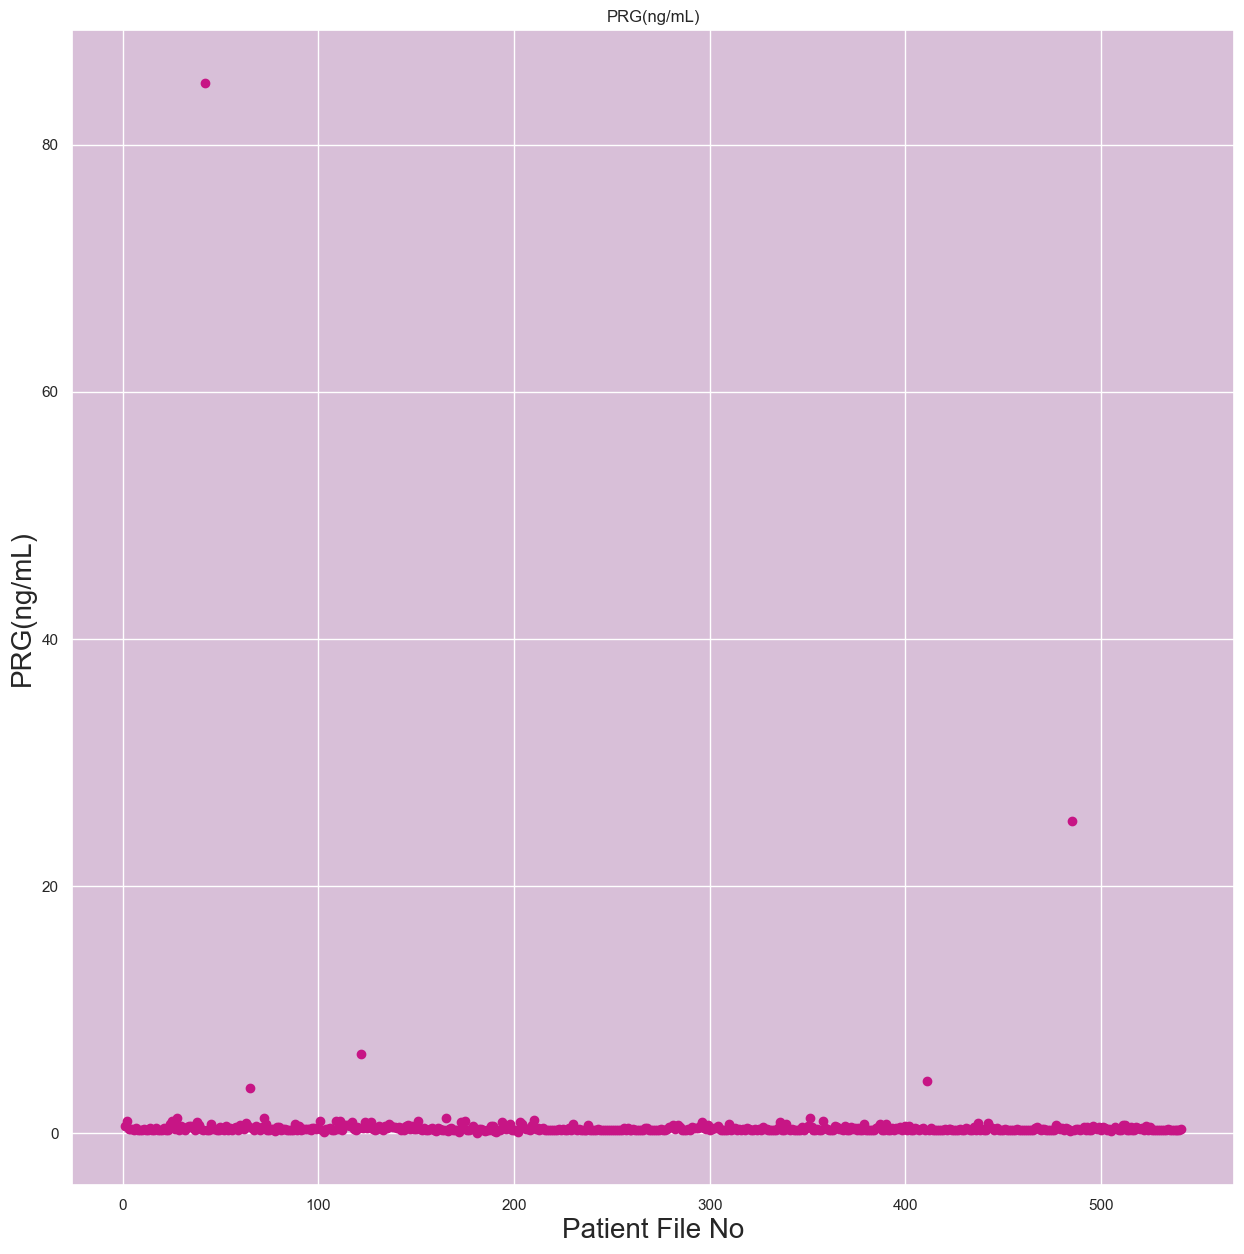

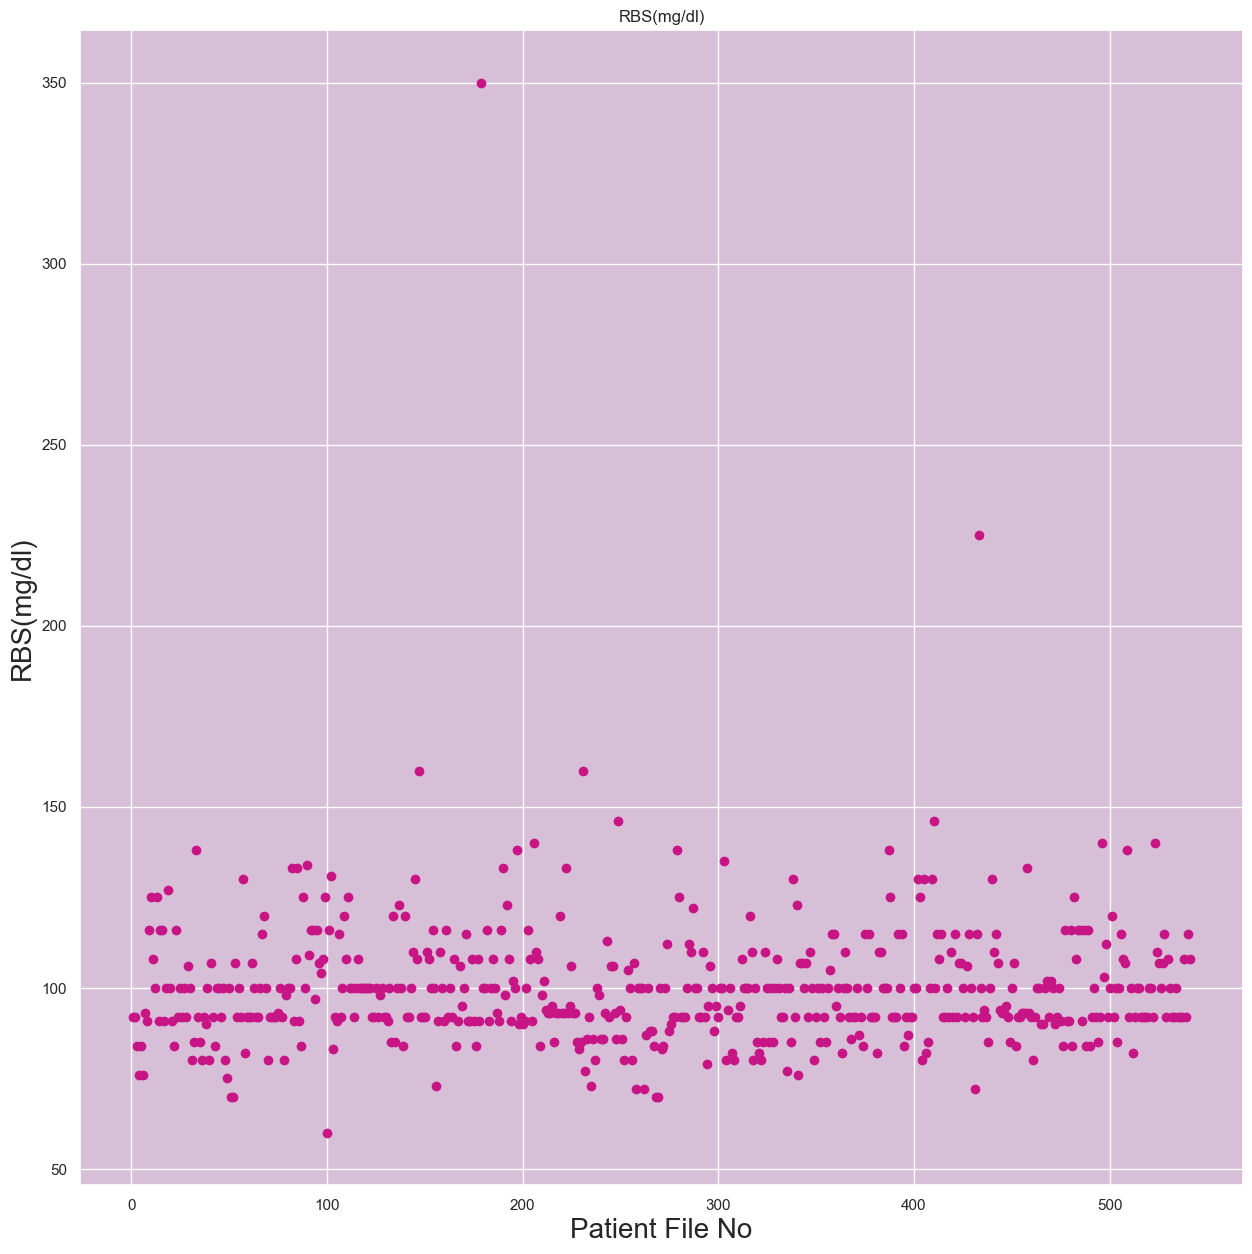

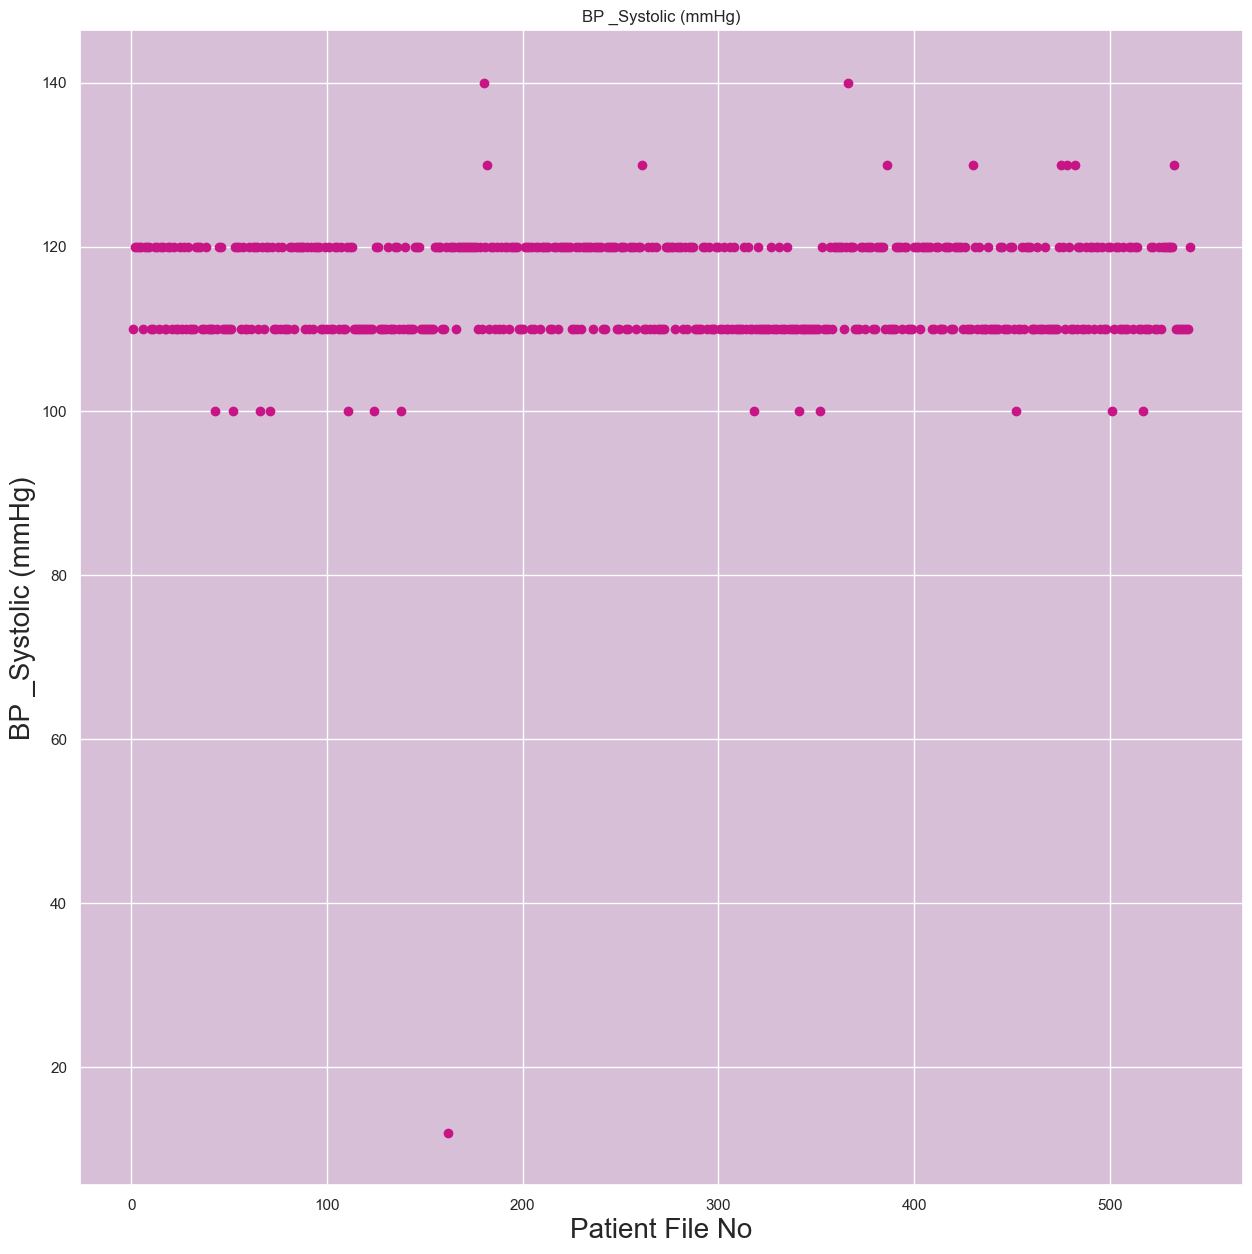

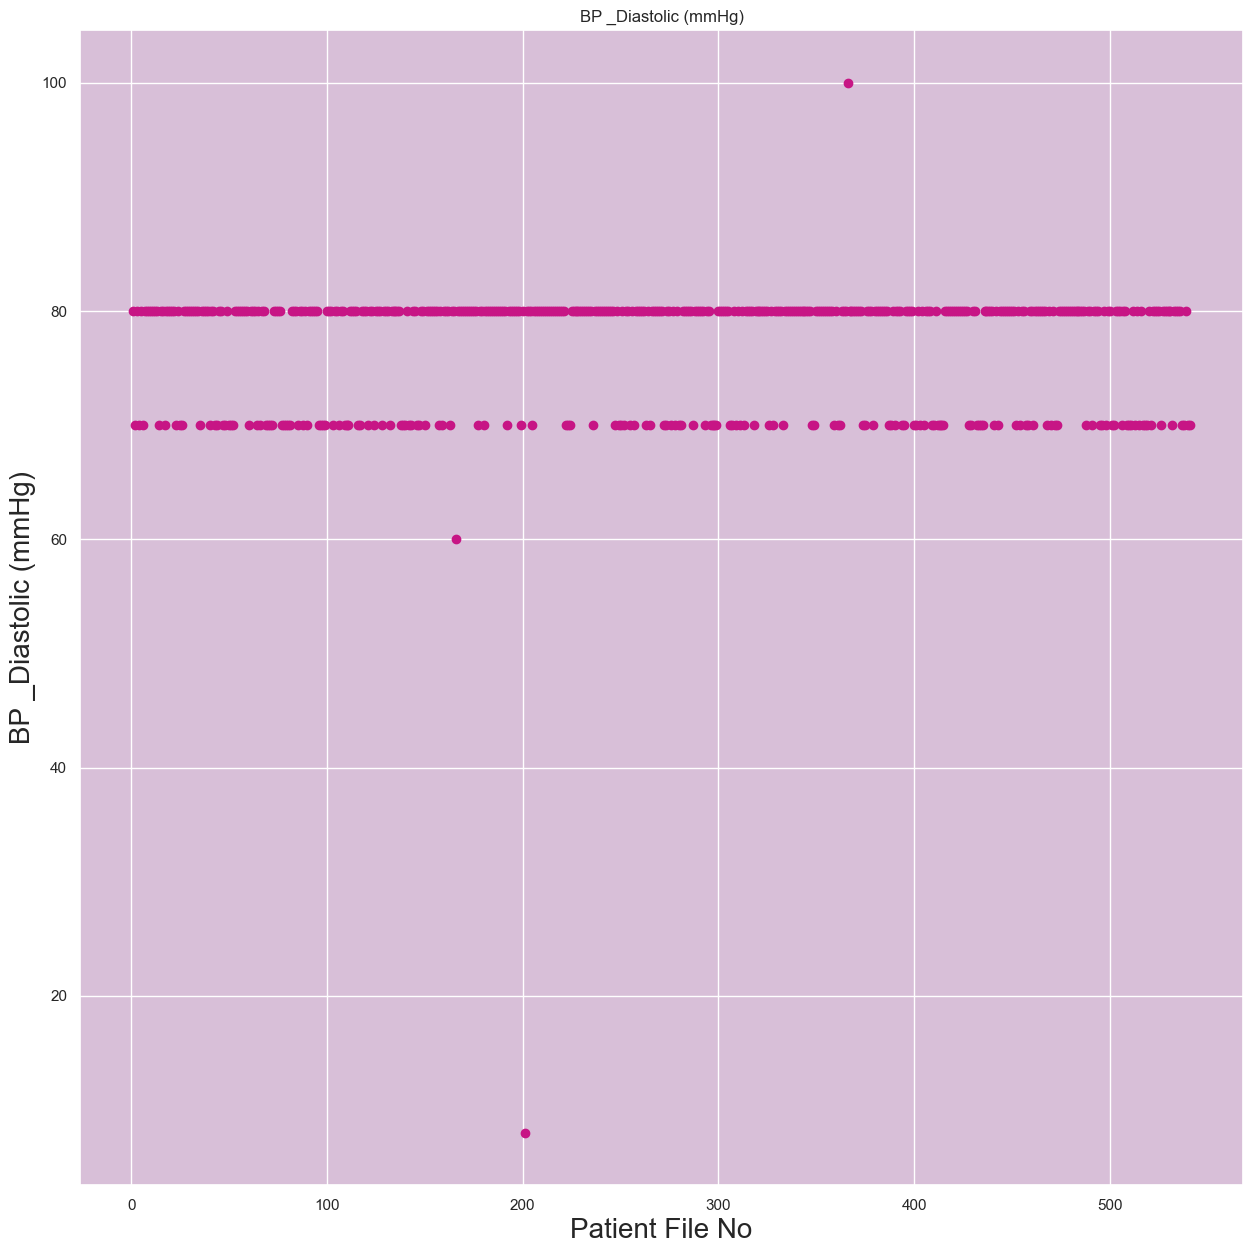

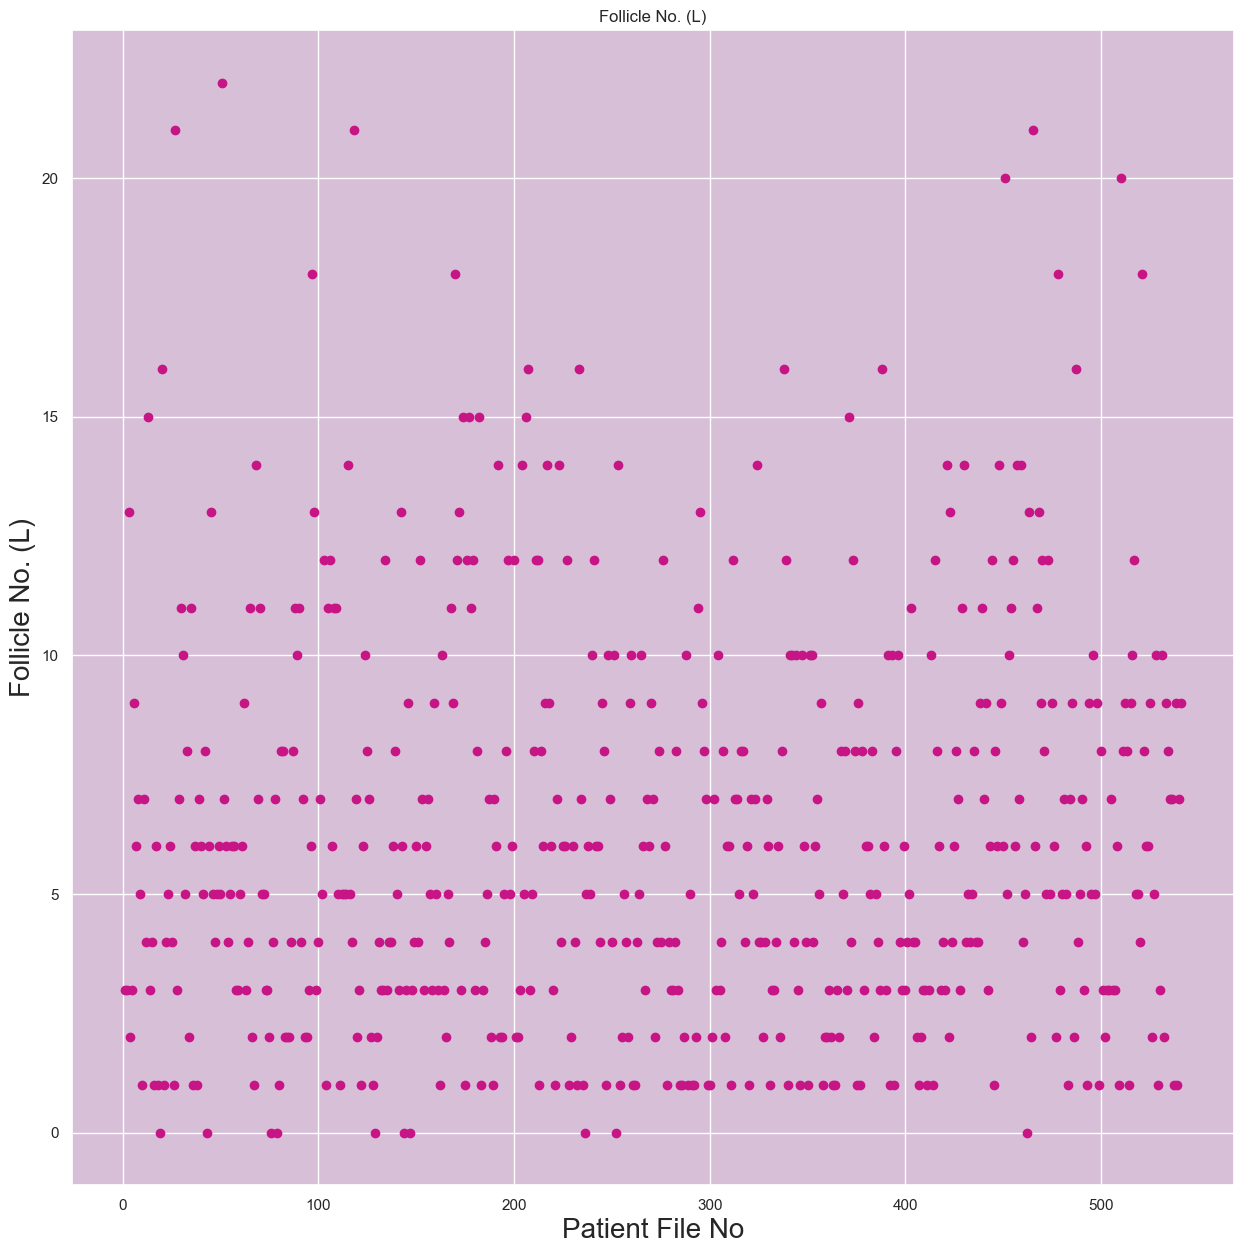

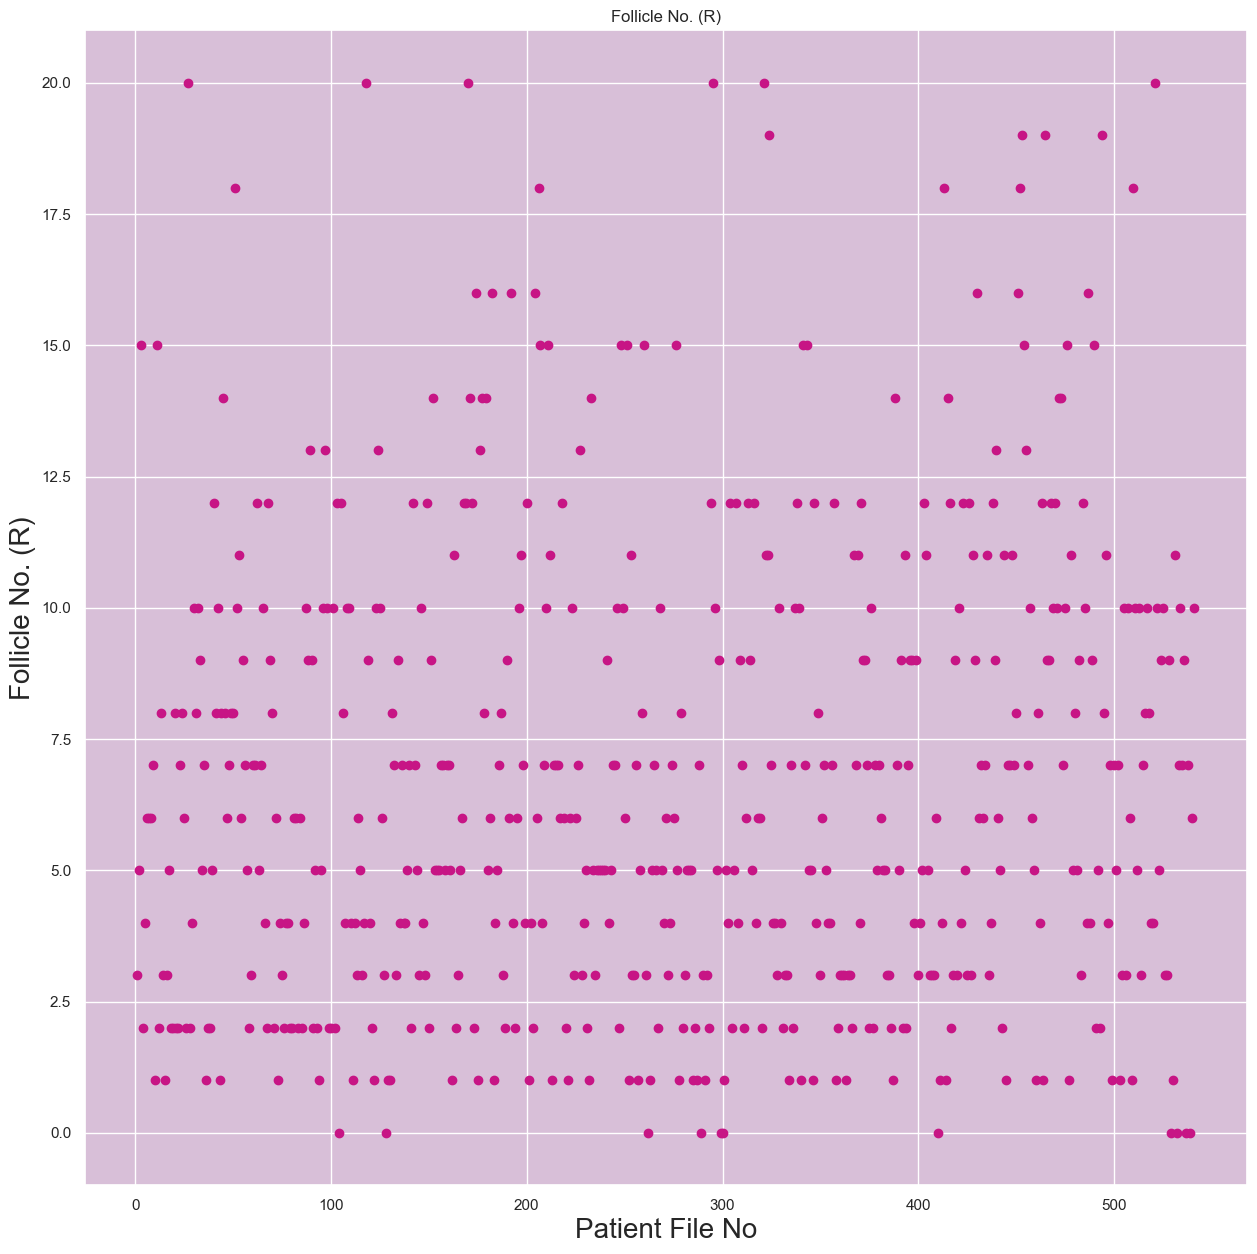

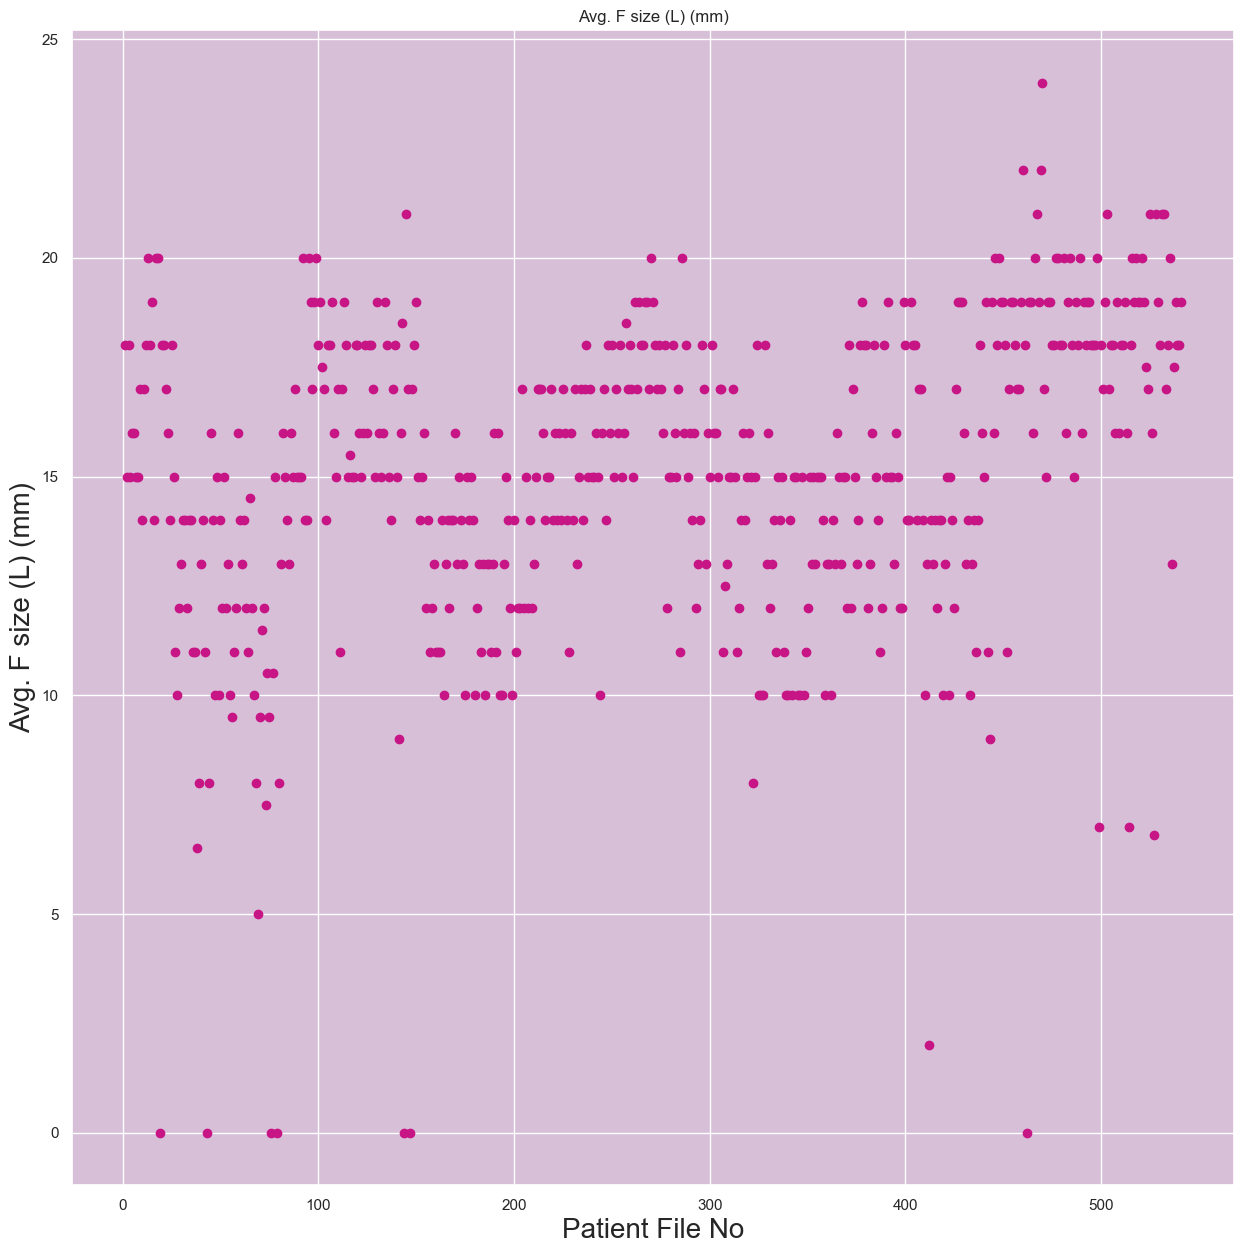

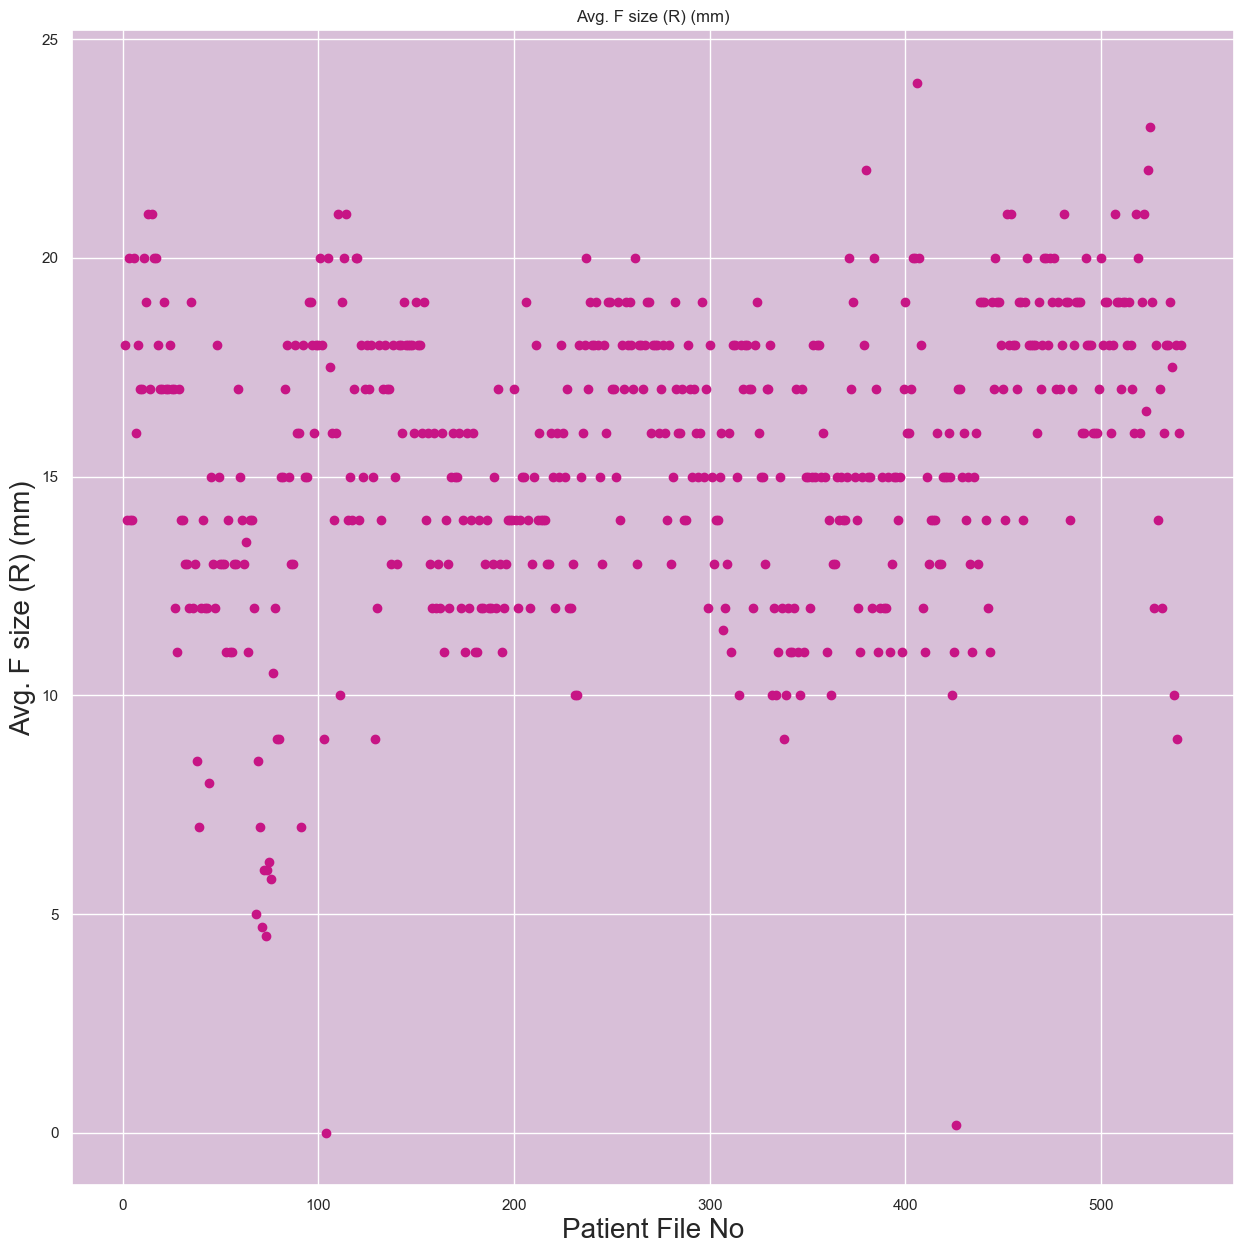

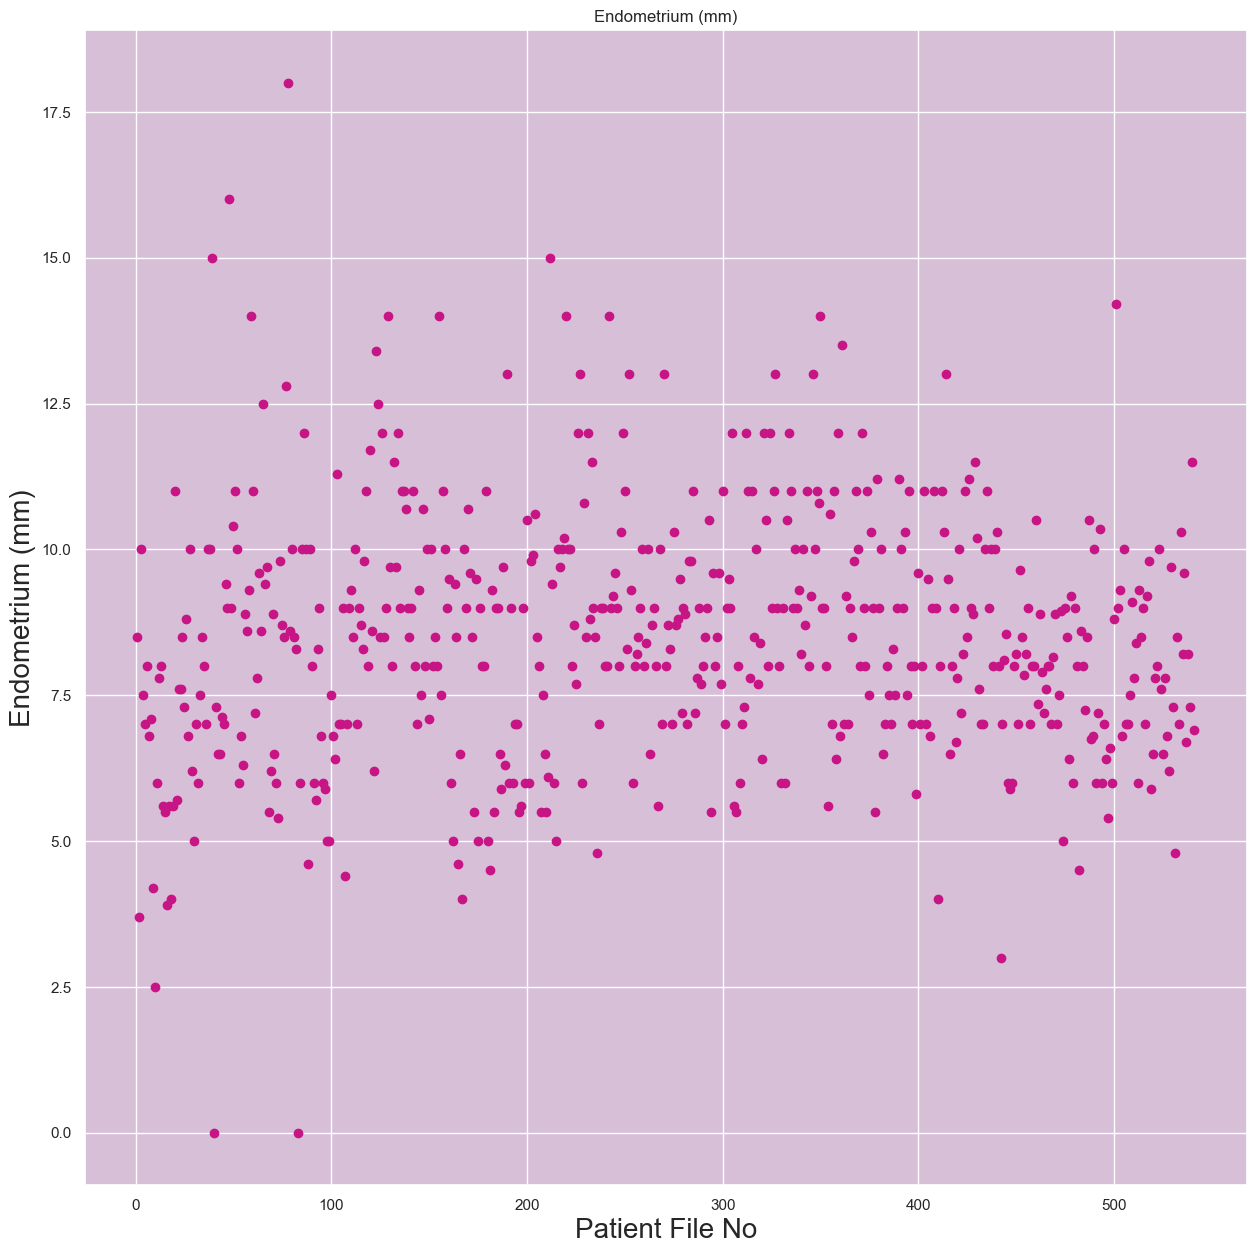

In [22]:
for i in ['Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'No. of aborptions',
       'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']:
    fig, ax = plt.subplots()
    ax.set_facecolor('thistle')
    sns.set(rc = {'figure.figsize':(15,15)})
    plt.scatter(data['Patient File No.'], data[i], color = 'mediumvioletred')
    ax.set_xlabel('Patient File No', fontsize=20)
    ax.set_ylabel(i, fontsize=20)
    ax.set_title(i)
    plt.show()

Dropping outliars:

In [23]:
data = data[(data["Weight (Kg)"]<90)]
data = data[(data["Height(Cm)"]>140) & (data["Height(Cm)"]<175)]
data = data[(data["Pulse rate(bpm)"]>20)]
data = data[(data["I beta-HCG(mIU/mL)"]<15000)]
data = data[(data["II beta-HCG(mIU/mL)"]<15000)]
data = data[(data["FSH(mIU/mL)"]<5000)]
data = data[(data["LH(mIU/mL)"]<2000)]
data = data[(data["FSH/LH"]<1200)]
data = data[(data["TSH (mIU/L)"]<60)]
data = data[(data["Vit D3 (ng/mL)"]<5000)]
data = data[(data["AMH(ng/mL)"]<60)]
data = data[(data["BP _Systolic (mmHg)"]>20)]
data = data[(data["BP _Diastolic (mmHg)"]>20)]
data = data[(data["Avg. F size (L) (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
 
data.shape

(507, 44)

Checking highly correlated columns:

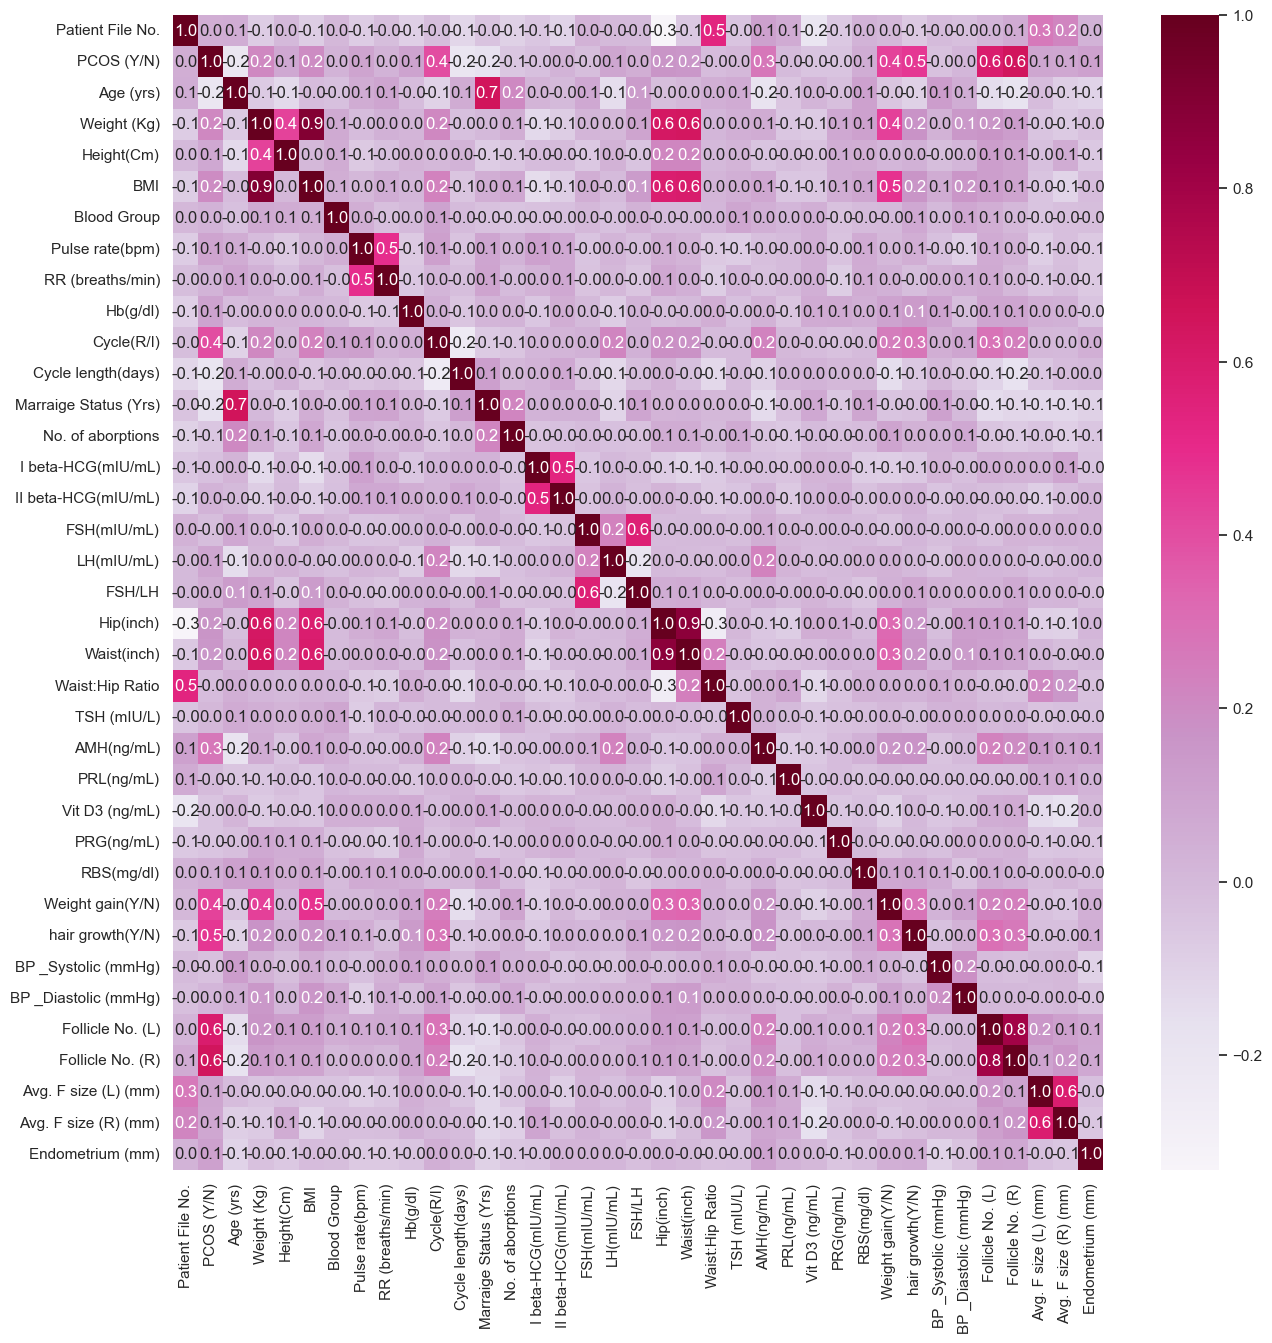

In [24]:
sns.heatmap(data.corr(), annot =True, fmt=".1f", cmap ='PuRd' )
sns.set(rc = {'figure.figsize':(200,200)})
plt.show()

In [25]:
data = data.drop(['Weight (Kg)'], axis = 1)
data = data.drop(['Height(Cm)'], axis = 1)
data = data.drop(['Waist(inch)'], axis = 1)
data = data.drop(['Hip(inch)'], axis = 1)

This column is not necessary anymore

In [26]:
data = data.drop(['Patient File No.'], axis = 1) 

## Models

In [27]:
y = data['PCOS (Y/N)'].values
X = data.drop('PCOS (Y/N)', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [28]:
y = data['PCOS (Y/N)']
X = data.drop('PCOS (Y/N)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### K-Nearest Neighbors(KNN)

In [29]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

print(model.score(X_test, y_test))
confusion_matrix(y_test,y_predict)

0.7007874015748031


array([[82,  9],
       [29,  7]], dtype=int64)

First KNN model's score is not very good. I will try it with different k's.

I took the code block below from this work:
https://www.kaggle.com/code/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

In [30]:
train_scores = []
test_scores = []

for i in range(1,15):

    model = KNeighborsClassifier(i)
    model.fit(X_train,y_train)
    
    train_scores.append(model.score(X_train,y_train))
    test_scores.append(model.score(X_test,y_test))

In [31]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 72.44094488188976 % and k = [8]


In [32]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 8,
 'p': 2,
 'weights': 'uniform'}

In [116]:
model = KNeighborsClassifier(n_neighbors= 8, metric= 'minkowski', p= 2,)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

print(model.score(X_test, y_test))
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

0.7165354330708661


Predicted    0   1  All
True                   
0           86   5   91
1           31   5   36
All        117  10  127

In [117]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83        91
           1       0.50      0.14      0.22        36

    accuracy                           0.72       127
   macro avg       0.62      0.54      0.52       127
weighted avg       0.67      0.72      0.65       127



In [118]:
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

Maximum predicted probability 1.0


### Logistic Regression

In [119]:
model = LogisticRegression(max_iter=150)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

print(model.score(X_test,y_test))
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

0.889763779527559


Predicted   0   1  All
True                  
0          85   6   91
1           8  28   36
All        93  34  127

In [120]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        91
           1       0.82      0.78      0.80        36

    accuracy                           0.89       127
   macro avg       0.87      0.86      0.86       127
weighted avg       0.89      0.89      0.89       127



In [121]:
model.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 150,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [122]:
model = LogisticRegression(C=1)

model.fit(X,y)

prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

Maximum predicted probability 0.9999783863943155


In [123]:
#Converting to arrays
y = data['PCOS (Y/N)'].values
X = data.drop('PCOS (Y/N)', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(model.score(X_test, y_test))
print(confusion_matrix(y_test, y_predict))
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

0.8571428571428571
[[132  17]
 [ 12  42]]


Predicted    0   1  All
True                   
0          132  17  149
1           12  42   54
All        144  59  203

In [124]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       149
           1       0.71      0.78      0.74        54

    accuracy                           0.86       203
   macro avg       0.81      0.83      0.82       203
weighted avg       0.86      0.86      0.86       203



### Support Vector Machine(SVM)

In [125]:
model1 = SVC(max_iter=1500,kernel="poly",C=1.0,degree=2)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

print(model1.score(X_test,y_test))
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

0.7241379310344828


Predicted    0   1  All
True                   
0          132  17  149
1           12  42   54
All        144  59  203

In [126]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       149
           1       0.71      0.78      0.74        54

    accuracy                           0.86       203
   macro avg       0.81      0.83      0.82       203
weighted avg       0.86      0.86      0.86       203



In [127]:
model = SVC(max_iter=1500,kernel='rbf',C=2.0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(model.score(X_test,y_test))
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

0.6798029556650246


Predicted    0   1  All
True                   
0          132  17  149
1           12  42   54
All        144  59  203

In [128]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       149
           1       0.71      0.78      0.74        54

    accuracy                           0.86       203
   macro avg       0.81      0.83      0.82       203
weighted avg       0.86      0.86      0.86       203



In [129]:
model = SVC(max_iter=1500,kernel="linear",C=1.0,degree=2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

print(model.score(X_test,y_test))
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

0.9605911330049262


Predicted    0   1  All
True                   
0          132  17  149
1           12  42   54
All        144  59  203

In [130]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       149
           1       0.71      0.78      0.74        54

    accuracy                           0.86       203
   macro avg       0.81      0.83      0.82       203
weighted avg       0.86      0.86      0.86       203



We can see that precision and recall values and f1-score are not fully correlated with model scores.

Even though the model scores are different from each other, their confusion matrices are same.

### Decision Tree and Random Forest

In [131]:
model = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(model.score(X_test,y_test))
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

1.0


Predicted    0   1  All
True                   
0          149   0  149
1            0  54   54
All        149  54  203

In [132]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00        54

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [133]:
acc = accuracy_score(y_test, y_predict)
print("Accuracy score: {:.2f}".format(acc))

Accuracy score: 1.00


In [74]:
model2 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

[Text(0.5, 0.75, 'x[37] <= 0.5\nentropy = 0.952\nsamples = 304\nvalue = [191, 113]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 191\nvalue = [191, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 113\nvalue = [0, 113]')]

In [57]:
model3 = DecisionTreeClassifier(max_depth=8,criterion='entropy')
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

1.0

In [58]:
model = RandomForestClassifier(n_estimators=25,random_state=2)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(model.score(X_test,y_test))
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

1.0


Predicted    0   1  All
True                   
0          149   0  149
1            0  54   54
All        149  54  203

In [59]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00        54

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [60]:
accuracy_entropy = accuracy_score(y_test, y_predict)
print("Accuracy score: {:.2f}".format(accuracy_entropy))

Accuracy score: 1.00


In [61]:
mse = mean_squared_error(y_test, y_predict)
mse

0.0

Decision Tree and Random Forest might not be a good choice for this data.

In [62]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.7598684210526315
0.645320197044335
0.8980263157894737
0.8768472906403941
0.6513157894736842
0.6945812807881774
1.0
1.0
1.0
1.0


Can machine learning algorithms used in diagnosis of PCOS? If yes, then which one is a good option?
Most of the models have high model scores. But scores can be misleading when it comes to diagnose a medical condition. Mispredicting a single case can cause dangerous consequences. It is critical to predict every single case accurate. 
